In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
colab_dir = '/content/gdrive/My Drive/Colab Notebooks'
my_dir    = '/Big Data/DoAn/SpotifyData'
path      = colab_dir + my_dir
%cd $path

/content/gdrive/My Drive/Colab Notebooks/Big Data/DoAn/SpotifyData


## **Crawl Data**

INSTALL & IMPORT LIBRABRY

In [ ]:
!pip install spotipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.6/238.6 KB 9.1 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import pandas as pd

CRAWL SPOTIFY PLAYLIST

In [ ]:
credentials = json.load(open('authorization.json'))
client_id = credentials['client_id']
client_secret = credentials['client_secret']

playlist_index = 0

playlists = json.load(open('playlist.json'))
playlist_uri = playlists[playlist_index]['uri']
like = playlists[playlist_index]['like']

In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id,client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager, requests_timeout=10, retries=5)

In [ ]:
uri = playlist_uri    
username = uri.split(':')[2]
playlist_id = uri.split(':')[4]

In [ ]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    results = tracks    

    playlist_tracks_id = []
    playlist_tracks_titles = []
    playlist_tracks_artists = []
    playlist_tracks_first_artists = []
    playlist_tracks_first_release_date = []
    playlist_tracks_popularity = []
    playlist_tracks_album_name = []
    playlist_tracks_explicit = []

    for i in range(len(results)):
        print(i) 
        if i == 0:
            playlist_tracks_id = results[i]['track']['id']
            playlist_tracks_titles = results[i]['track']['name']
            playlist_tracks_first_release_date = results[i]['track']['album']['release_date']
            playlist_tracks_album_name =  results[i]['track']['album']['name']
            playlist_tracks_popularity = results[i]['track']['popularity']
            playlist_tracks_explicit = results[i]['track']['explicit']

            artist_list = []
            for artist in results[i]['track']['artists']:
                artist_list= artist['name']
            playlist_tracks_artists = artist_list


            features = sp.audio_features(playlist_tracks_id)
            features_df = pd.DataFrame(data=features, columns=features[0].keys())
            features_df['title'] = playlist_tracks_titles
            features_df['all_artists'] = playlist_tracks_artists
            features_df['album_name'] = playlist_tracks_album_name
            features_df['popularity'] = playlist_tracks_popularity
            features_df['release_date'] = playlist_tracks_first_release_date
            features_df['explicit'] = playlist_tracks_explicit
         
            features_df = features_df[['id', 'title', 'all_artists','album_name','popularity','release_date','explicit','speechiness',
                                       'danceability', 'energy', 'key', 'loudness',
                                       'mode', 'acousticness', 'instrumentalness',
                                       'liveness', 'valence', 'tempo',
                                       'duration_ms', 'time_signature']]
            continue
        else:
            try:
                playlist_tracks_id = results[i]['track']['id']
                playlist_tracks_titles = results[i]['track']['name']
                playlist_tracks_first_release_date = results[i]['track']['album']['release_date']
                playlist_tracks_album_name =  results[i]['track']['album']['name']
                playlist_tracks_popularity = results[i]['track']['popularity']
                playlist_tracks_explicit = results[i]['track']['explicit']

                artist_list = []
                for artist in results[i]['track']['artists']:
                    artist_list= artist['name']
                playlist_tracks_artists = artist_list


                features = sp.audio_features(playlist_tracks_id)
                new_row = {'id':[playlist_tracks_id],
               'title':[playlist_tracks_titles],
               'all_artists':[playlist_tracks_artists],
               'album_name':[playlist_tracks_album_name],
               'popularity':[playlist_tracks_popularity],
               'release_date':[playlist_tracks_first_release_date],
               'explicit':[playlist_tracks_explicit],
               'speechiness':[features[0]['speechiness']],
               'danceability':[features[0]['danceability']],
               'energy':[features[0]['energy']],
               'key':[features[0]['key']],
               'loudness':[features[0]['loudness']],
               'mode':[features[0]['mode']],
               'acousticness':[features[0]['acousticness']],
               'instrumentalness':[features[0]['instrumentalness']],
               'liveness':[features[0]['liveness']],
               'valence':[features[0]['valence']],
               'tempo':[features[0]['tempo']],
               'duration_ms':[features[0]['duration_ms']],
               'time_signature':[features[0]['time_signature']]
               }

                dfs = [features_df, pd.DataFrame(new_row)]
                features_df = pd.concat(dfs, ignore_index = True)
            except:
                continue
                
    return features_df

In [ ]:
df = get_playlist_tracks(username, playlist_id)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
518

In [ ]:
df.to_csv('SpotifyDataCrawl.csv')

## **EDA**

In [ ]:
playlistDF=pd.read_csv('SpotifyDataCrawling.csv')

In [ ]:
# Show that there are duplicates of songs accross playlists
playlistDF[['all_artists','album_name','title']]

,all_artists,album_name,title
0,Taylor Swift,...Ready For It?,...Ready For It?
1,Thomas Rhett,Life Changes,Life Changes
2,Bruno Mars,24K Magic,24K Magic
3,Ed Sheeran,÷ (Deluxe),Galway Girl
4,Ed Sheeran,x (Deluxe Edition),Photograph
...,...,...,...
9896,Elton John,Goodbye Yellow Brick Road (40th Anniversary Ce...,Funeral For A Friend / Love Lies Bleeding
9897,Supertramp,Even In The Quietest Moments,Fool's Overture
9898,Yes,Fragile (Deluxe Edition),Heart of the Sunrise - 2003 Remaster
9899,Wings,Wings Over America (Remastered),Venus And Mars / Rock Show / Jet - Live / Rema...


In [ ]:
# Drop song duplicates
def drop_duplicates(df):
    '''
    Drop duplicate songs
    '''
    df['artists_song'] = df.apply(lambda row: row['all_artists']+row['title'],axis = 1)
    return df.drop_duplicates('artists_song')

songDF = drop_duplicates(playlistDF)
print("Are all songs unique: ",len(pd.unique(songDF.artists_song))==len(songDF))

Are all songs unique:  True


In [ ]:
describe=songDF['album_name'].describe()
print(str(describe)+'\n')

count              9352
unique             6259
top       Greatest Hits
freq                 33
Name: album_name, dtype: object



In [ ]:
songDF=songDF.drop('Unnamed: 0',axis=1)


In [ ]:
songDF

,id,title,all_artists,album_name,popularity,release_date,explicit,speechiness,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genres,artist_pop,genres_list,artists_song
0,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,Taylor Swift,...Ready For It?,0,2017-09-03,False,0.1350,0.615,0.779,2,-6.454,1,0.0665,0.000000,0.1550,0.453,160.000,208198,4,pop,100,[pop],Taylor Swift...Ready For It?
1,4Vxu50qVrQcycjRyJQaZLC,Life Changes,Thomas Rhett,Life Changes,60,2017-09-08,False,0.0576,0.687,0.845,7,-4.370,1,0.1000,0.000000,0.0452,0.809,87.972,190227,4,contemporary_country country country_road,75,"[contemporary_country, country, country_road]",Thomas RhettLife Changes
2,6b8Be6ljOzmkOmFslEb23P,24K Magic,Bruno Mars,24K Magic,77,2016-11-17,False,0.0797,0.818,0.803,1,-4.282,1,0.0340,0.000000,0.1530,0.632,106.970,225983,4,dance_pop pop,90,"[dance_pop, pop]",Bruno Mars24K Magic
3,0afhq8XCExXpqazXczTSve,Galway Girl,Ed Sheeran,÷ (Deluxe),77,2017-03-03,False,0.1000,0.624,0.876,9,-3.374,1,0.0735,0.000000,0.3270,0.781,99.943,170827,4,pop uk_pop,92,"[pop, uk_pop]",Ed SheeranGalway Girl
4,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,Ed Sheeran,x (Deluxe Edition),83,2014-06-21,False,0.0476,0.614,0.379,4,-10.480,1,0.6070,0.000464,0.0986,0.201,107.989,258987,4,pop uk_pop,92,"[pop, uk_pop]",Ed SheeranPhotograph
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,7xBXbeQkcVeOELZgGa705e,"Remember the Future, Pt. 1",Nektar,Remember the Future,0,1973-11-13,False,0.0449,0.391,0.590,9,-13.622,1,0.6760,0.553000,0.0661,0.479,113.675,1001120,4,art_rock krautrock progressive_rock psychedeli...,35,"[art_rock, krautrock, progressive_rock, psyche...","NektarRemember the Future, Pt. 1"
9896,4UFlPCB4THnQ9TlPHqIQow,Funeral For A Friend / Love Lies Bleeding,Elton John,Goodbye Yellow Brick Road (40th Anniversary Ce...,0,1973-10-05,False,0.0465,0.410,0.761,9,-8.507,0,0.0198,0.084700,0.2470,0.193,138.712,666572,4,glam_rock mellow_gold piano_rock,85,"[glam_rock, mellow_gold, piano_rock]",Elton JohnFuneral For A Friend / Love Lies Ble...
9897,5pSSEkT0963muzzIjsVkrs,Fool's Overture,Supertramp,Even In The Quietest Moments,50,1977-01-01,False,0.0372,0.406,0.306,3,-10.482,1,0.3130,0.007900,0.0727,0.073,135.272,652560,4,album_rock art_rock classic_rock glam_rock mel...,71,"[album_rock, art_rock, classic_rock, glam_rock...",SupertrampFool's Overture
9898,7gC6Rbllqf1yXNC02e5jz2,Heart of the Sunrise - 2003 Remaster,Yes,Fragile (Deluxe Edition),44,1971-11-26,False,0.0394,0.362,0.507,1,-11.229,1,0.0174,0.216000,0.1130,0.456,146.641,634440,3,album_rock art_rock classic_rock jazz_fusion p...,62,"[album_rock, art_rock, classic_rock, jazz_fusi...",YesHeart of the Sunrise - 2003 Remaster


Text(0.5, 1.0, 'Top 10 nghệ sĩ có lượt nghe cao nhất')

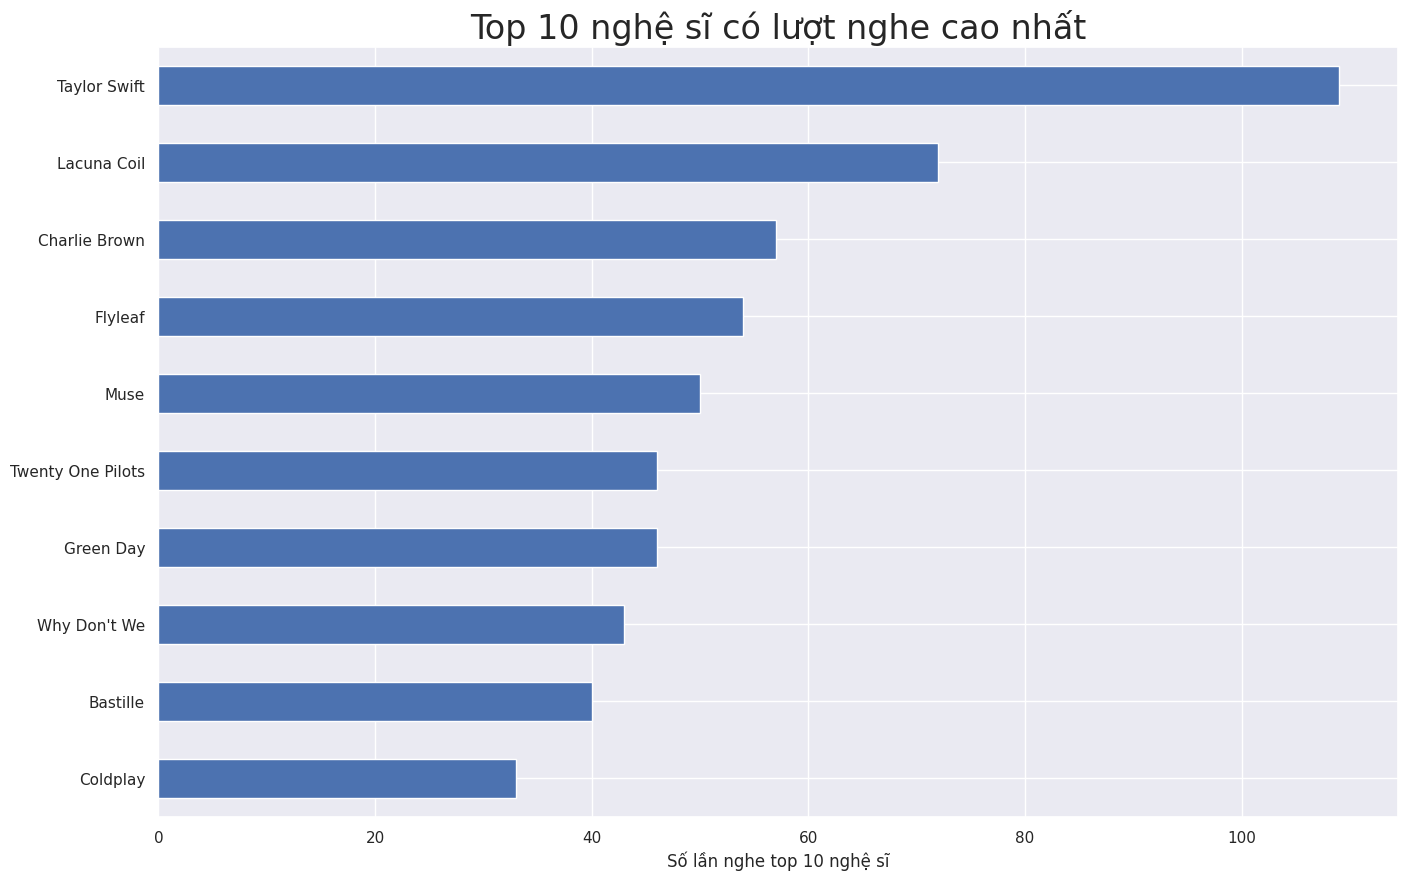

In [ ]:
ax = songDF['all_artists'].value_counts().sort_values().tail(10)\
                       .plot.barh(figsize=(16,10))
ax.xaxis.grid(True)
ax.set(xlabel='Số lần nghe top 10 nghệ sĩ')
ax.set_title('Top 10 nghệ sĩ có lượt nghe cao nhất', fontsize=24)
# ax.annotate('Billboard Year-End\nHot 100 1960-2017', xy=(32.5,1),
#             fontsize=12, ha='center')

In [ ]:
#Tách các cột biến Numerical và Categorical
numeric_df = songDF.select_dtypes('number')


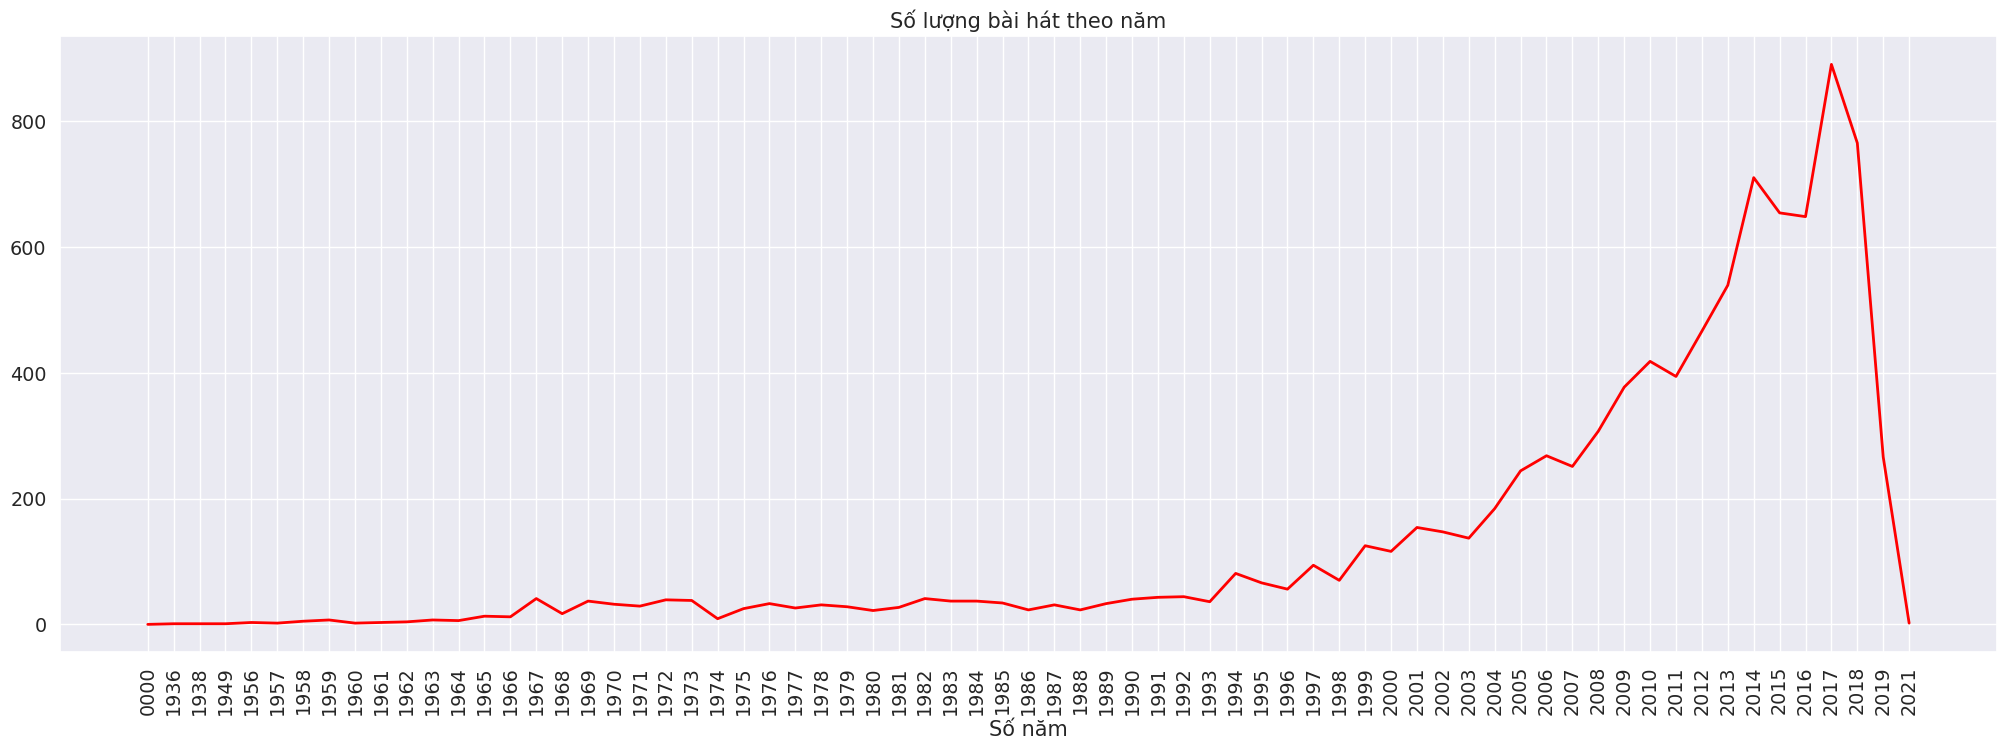

In [ ]:

# Plot
plt.figure(figsize=(25,8))
plt.plot(songs_per_year['release_date'], songs_per_year['title'], color='red',linewidth = 2)
# plt.axvline(monthly_data.sort_values(by = ["Sales"] , ascending = False).reset_index()['Order Date'][0], color='black')

plt.xlabel("Số năm")
plt.title("Số lượng bài hát theo năm")
plt.xticks(rotation='vertical')
plt.show()

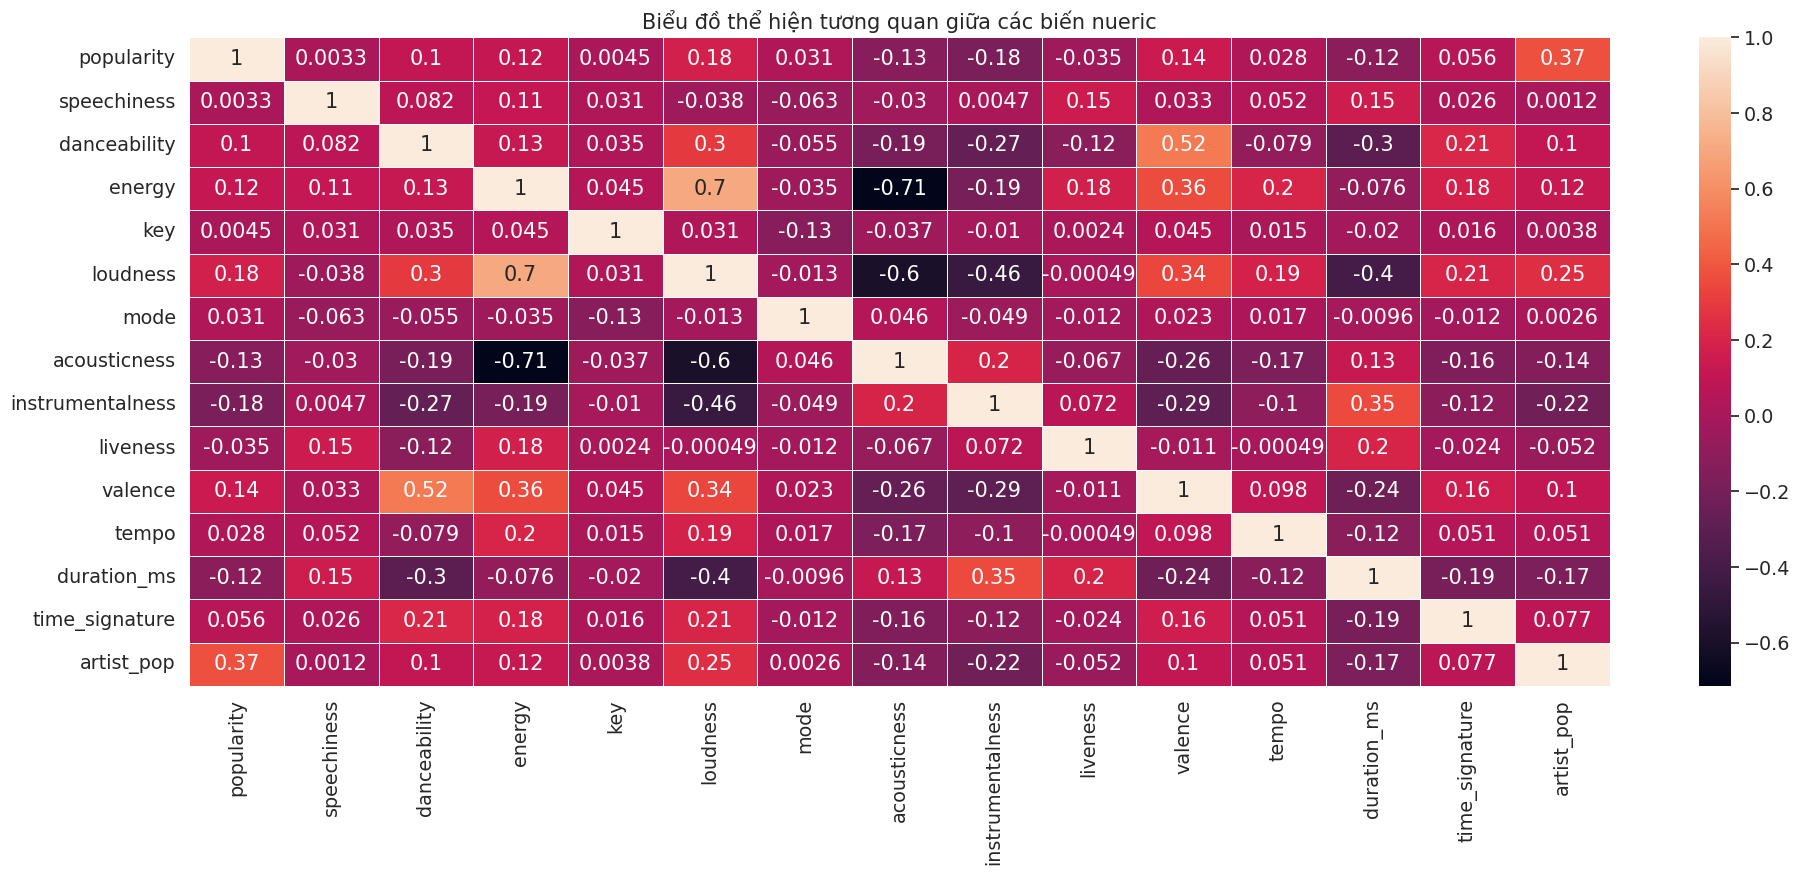

In [ ]:
#plotting the heatmap
f, ax = plt.subplots(figsize=(20,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(numeric_df.corr(), annot=True, linewidths=.5, ax=ax)
ax.set(title='Biểu đồ thể hiện tương quan giữa các biến nueric')
plt.tight_layout()

[Text(0, 0.5, 'Acousticness'), Text(0.5, 0, 'Energy')]

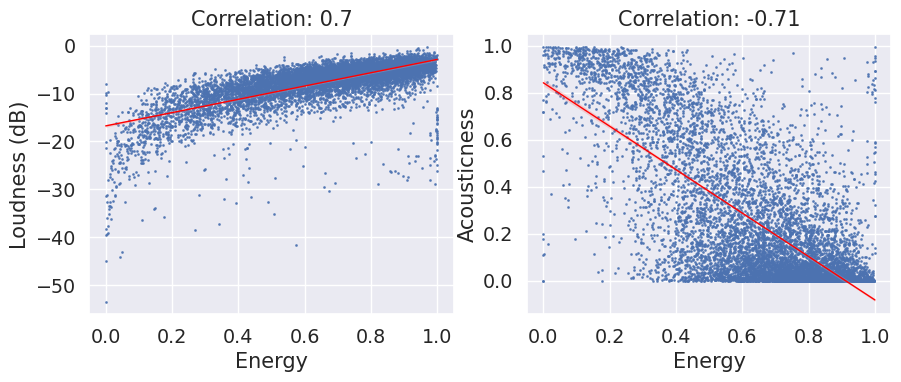

In [ ]:
# generate subplot axes
axes = list()
plt.figure(figsize = (16,8))
grid_positions = [231, 232]
for position in grid_positions:
    axes.append(plt.subplot(position))
    
feature_pairs = [('energy', 'loudness'), ('energy', 'acousticness')]

# generate upper scatter plots
for (x, y), ax in zip(feature_pairs, axes[:3]):
    r = np.corrcoef(df[x].dropna(), df[y].dropna())[0][1]
    sns.regplot(data=df, x=x, y=y, line_kws= {'linewidth': 1, 'color': 'red'},
                scatter_kws={'s': 1}, label='test', ax=ax)
    ax.set(title='Correlation: {:.2}'.format(r))
axes[0].set(ylabel='Loudness (dB)', xlabel='Energy')
axes[1].set(ylabel='Acousticness', xlabel='Energy')


In [ ]:
songDF

,id,title,all_artists,album_name,popularity,release_date,speechiness,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genres,artist_pop,genres_list,artists_song
0,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,Taylor Swift,...Ready For It?,0,2017-09-03,0.1350,0.615,0.779,2,-6.454,1,0.0665,0.000000,0.1550,0.453,160.000,208198,pop,100,[pop],Taylor Swift...Ready For It?
1,4Vxu50qVrQcycjRyJQaZLC,Life Changes,Thomas Rhett,Life Changes,60,2017-09-08,0.0576,0.687,0.845,7,-4.370,1,0.1000,0.000000,0.0452,0.809,87.972,190227,contemporary_country country country_road,75,"[contemporary_country, country, country_road]",Thomas RhettLife Changes
2,6b8Be6ljOzmkOmFslEb23P,24K Magic,Bruno Mars,24K Magic,77,2016-11-17,0.0797,0.818,0.803,1,-4.282,1,0.0340,0.000000,0.1530,0.632,106.970,225983,dance_pop pop,90,"[dance_pop, pop]",Bruno Mars24K Magic
3,0afhq8XCExXpqazXczTSve,Galway Girl,Ed Sheeran,÷ (Deluxe),77,2017-03-03,0.1000,0.624,0.876,9,-3.374,1,0.0735,0.000000,0.3270,0.781,99.943,170827,pop uk_pop,92,"[pop, uk_pop]",Ed SheeranGalway Girl
4,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,Ed Sheeran,x (Deluxe Edition),83,2014-06-21,0.0476,0.614,0.379,4,-10.480,1,0.6070,0.000464,0.0986,0.201,107.989,258987,pop uk_pop,92,"[pop, uk_pop]",Ed SheeranPhotograph
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,7xBXbeQkcVeOELZgGa705e,"Remember the Future, Pt. 1",Nektar,Remember the Future,0,1973-11-13,0.0449,0.391,0.590,9,-13.622,1,0.6760,0.553000,0.0661,0.479,113.675,1001120,art_rock krautrock progressive_rock psychedeli...,35,"[art_rock, krautrock, progressive_rock, psyche...","NektarRemember the Future, Pt. 1"
9896,4UFlPCB4THnQ9TlPHqIQow,Funeral For A Friend / Love Lies Bleeding,Elton John,Goodbye Yellow Brick Road (40th Anniversary Ce...,0,1973-10-05,0.0465,0.410,0.761,9,-8.507,0,0.0198,0.084700,0.2470,0.193,138.712,666572,glam_rock mellow_gold piano_rock,85,"[glam_rock, mellow_gold, piano_rock]",Elton JohnFuneral For A Friend / Love Lies Ble...
9897,5pSSEkT0963muzzIjsVkrs,Fool's Overture,Supertramp,Even In The Quietest Moments,50,1977-01-01,0.0372,0.406,0.306,3,-10.482,1,0.3130,0.007900,0.0727,0.073,135.272,652560,album_rock art_rock classic_rock glam_rock mel...,71,"[album_rock, art_rock, classic_rock, glam_rock...",SupertrampFool's Overture
9898,7gC6Rbllqf1yXNC02e5jz2,Heart of the Sunrise - 2003 Remaster,Yes,Fragile (Deluxe Edition),44,1971-11-26,0.0394,0.362,0.507,1,-11.229,1,0.0174,0.216000,0.1130,0.456,146.641,634440,album_rock art_rock classic_rock jazz_fusion p...,62,"[album_rock, art_rock, classic_rock, jazz_fusi...",YesHeart of the Sunrise - 2003 Remaster


In [ ]:
df=songDF.copy()

In [ ]:
import datetime

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

## **K-Means**


In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from math import pi, ceil
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [ ]:
%matplotlib inline

sns.set(rc={'figure.figsize': (12,8)})

warnings.filterwarnings('ignore')

In [ ]:

playlistDF_test = pd.read_csv("songs_w_ratings.csv")



In [ ]:
playlistDF_test = playlistDF_test.drop(['matched'], axis=1)


In [ ]:
playlistDF_test

,Unnamed: 0,id,title,all_artists,album_name,popularity,release_date,explicit,speechiness,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genres,artist_pop,genres_list
0,51,0CLnkxpa3M4eA3HeGaERat,Gorgeous,Taylor Swift,Gorgeous,0,10/20/2017,False,0.1690,0.794,...,0.07900,0.000005,0.2270,0.4180,92.022,209680,4,pop,100,[pop]
1,212,4nYsmWkuTaowTMy4gskmBw,What Lovers Do (feat. SZA),SZA,Red Pill Blues (Deluxe),0,11/03/2017,False,0.0693,0.792,...,0.08050,0.000004,0.0852,0.4200,109.959,199849,4,pop,87,[pop]
2,247,0V8FYVlBFuXXTIvRnMbZyS,The Climb,Miley Cyrus,Hannah Montana The Movie,67,01/01/2009,False,0.0336,0.327,...,0.08340,0.000000,0.1040,0.3290,161.074,236067,4,pop,93,[pop]
3,539,4svZDCRz4cJoneBpjpx8DJ,I Did Something Bad,Taylor Swift,reputation,73,11/10/2017,False,0.1590,0.696,...,0.06790,0.000021,0.0696,0.3050,82.989,238253,4,pop,100,[pop]
4,540,1ZY1PqizIl78geGM4xWlEA,Gorgeous,Taylor Swift,reputation,76,11/10/2017,False,0.1350,0.800,...,0.07130,0.000009,0.2130,0.4510,92.027,209680,4,pop,100,[pop]
5,583,4lIxdJw6W3Fg4vUIYCB0S5,Style,Taylor Swift,1989,73,10/27/2014,False,0.0383,0.598,...,0.00253,0.001600,0.1170,0.4560,95.019,231000,4,pop,100,[pop]
6,1064,5P4wWhUYWM0IaVYLuZxdar,The Way I Loved You,Taylor Swift,Fearless,53,11/11/2008,False,0.0336,0.433,...,0.04080,0.000000,0.1150,0.3980,160.927,244227,4,pop,100,[pop]
7,1066,28M2gifMU282QBM3fKajIS,Haunted,Taylor Swift,Speak Now,57,10/25/2010,False,0.0570,0.436,...,0.08260,0.000001,0.1490,0.3520,162.088,242080,4,pop,100,[pop]
8,1067,6XDBA3QWX51lDJ0oZbaJJN,Long Live,Taylor Swift,Speak Now,55,10/25/2010,False,0.0346,0.418,...,0.03600,0.000076,0.1080,0.1420,204.125,317947,4,pop,100,[pop]
9,1074,49mWEy5MgtNujgT7xU3emT,Breathe,Colbie Caillat,Fearless,43,11/11/2008,False,0.0276,0.505,...,0.37900,0.000000,0.1130,0.1840,73.975,263973,4,pop,100,[pop]


In [ ]:
columns_to_cluster = ['acousticness', 'danceability', 'energy', 
                      'instrumentalness', 'liveness','valence', 'tempo','speechiness','loudness','popularity','explicit','key','mode','time_signature','artist_pop']

In [ ]:
# Currently using MinMaxScaler, due to minor inertia values in KMeans
ss = StandardScaler()

songs_scaled = ss.fit_transform(playlistDF[columns_to_cluster])
print("StandardScaler: ", songs_scaled[0,:])
user_scaled = ss.fit_transform(playlistDF_test[columns_to_cluster])
print("StandardScaler: ", user_scaled[0,:])

StandardScaler:  [-0.59178694  0.28188069  0.56571782 -0.40135329 -0.19481983 -0.08060907
  1.40139069  0.8751379   0.27755522 -1.11005669 -0.31194051 -0.90023329
  0.72691391  0.18527641  1.91058438]
StandardScaler:  [-0.3915401   1.21523539 -0.44306121 -0.347239    1.96594367  0.1255791
 -0.91702889  2.38794678 -0.13456138 -2.05984267  0.          0.78889123
  0.42008403  0.22941573  0.36335983]


In [ ]:
mms = MinMaxScaler()

songs_scaled = mms.fit_transform(playlistDF[columns_to_cluster])
print("MinMaxScaler: ", songs_scaled[0,:])

user_scaled = mms.fit_transform(playlistDF_test[columns_to_cluster])
print("Dados de usuários: ", user_scaled[0,:])

MinMaxScaler:  [0.06683417 0.62755102 0.779      0.         0.15688259 0.45757576
 0.66636958 0.14106583 0.8837848  0.         0.         0.18181818
 1.         0.8        1.        ]
Dados de usuários:  [0.09388928 0.90856031 0.50360577 0.0031125  0.93285124 0.45857368
 0.13866308 1.         0.68094557 0.         0.         0.7
 1.         1.         1.        ]


In [ ]:
columns_to_cluster_scaled = ['acousticness_scaled', 'danceability_scaled','energy_scaled', 'instrumentalness_scaled', 'liveness_scaled',
                        'valence_scaled', 'tempo_scaled','speechiness_scaled', 'loudness_scaled','popularity_scaled','explicit_scaled','key_scaled','mode_scaled','time_signature_scaled','artist_pop_scaled']

df_songs_scaled = pd.DataFrame(songs_scaled, columns=columns_to_cluster_scaled)

In [ ]:
df_songs_scaled

,acousticness_scaled,danceability_scaled,energy_scaled,instrumentalness_scaled,liveness_scaled,valence_scaled,tempo_scaled,speechiness_scaled,loudness_scaled,popularity_scaled,explicit_scaled,key_scaled,mode_scaled,time_signature_scaled,artist_pop_scaled
0,0.066834,0.627551,0.779,0.000000,0.156883,0.457576,0.666370,0.141066,0.883785,0.000000,0.0,0.181818,1.0,0.8,1.00
1,0.100503,0.701020,0.845,0.000000,0.045749,0.817172,0.366387,0.060188,0.922987,0.681818,0.0,0.636364,1.0,0.8,0.75
2,0.034171,0.834694,0.803,0.000000,0.154858,0.638384,0.445510,0.083281,0.924643,0.875000,0.0,0.090909,1.0,0.8,0.90
3,0.073869,0.636735,0.876,0.000000,0.330972,0.788889,0.416244,0.104493,0.941723,0.875000,0.0,0.818182,1.0,0.8,0.92
4,0.610050,0.626531,0.379,0.000464,0.099798,0.203030,0.449754,0.049739,0.808051,0.943182,0.0,0.363636,1.0,0.8,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9896,0.019899,0.418367,0.761,0.084785,0.250000,0.194949,0.577709,0.048589,0.845166,0.000000,0.0,0.818182,0.0,0.8,0.85
9897,0.314573,0.414286,0.306,0.007908,0.073583,0.073737,0.563382,0.038871,0.808014,0.568182,0.0,0.272727,1.0,0.8,0.71
9898,0.017487,0.369388,0.507,0.216216,0.114372,0.460606,0.610732,0.041170,0.793962,0.500000,0.0,0.090909,1.0,0.6,0.62
9899,0.089146,0.337755,0.733,0.001742,0.958502,0.383838,0.535228,0.048903,0.842081,0.000000,0.0,0.181818,1.0,0.8,0.72


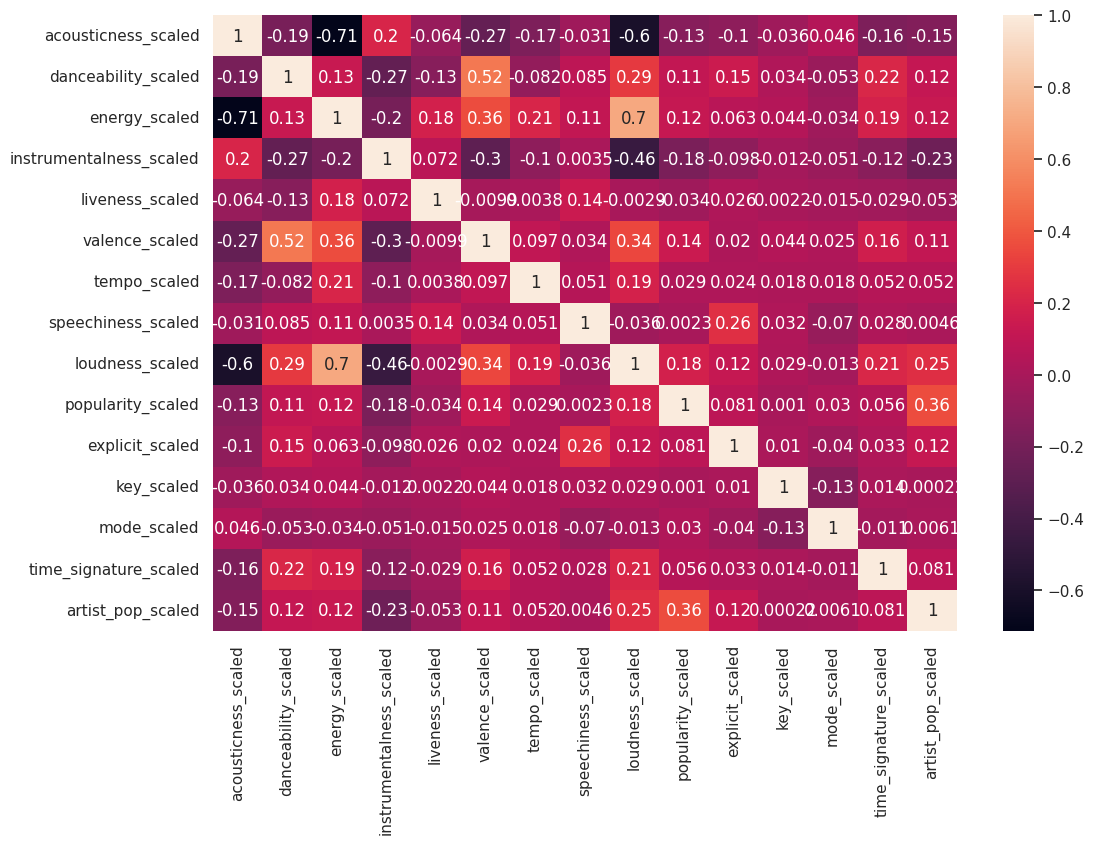

In [ ]:
#Scaled Heatmap
ax = sns.heatmap(df_songs_scaled.corr(), annot=True)
plt.show()


###### Training model

In [ ]:
n_clusters = range(2,8)
ssd = []
sc = []

for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=42)
    km.fit(songs_scaled)
    preds = km.predict(songs_scaled) 
    centers = km.cluster_centers_ 
    ssd.append(km.inertia_) 
    score = silhouette_score(songs_scaled, preds, metric='euclidean')
    sc.append(score)
    print("Number of Clusters = {}, Silhouette Score = {}".format(n, score))


Number of Clusters = 2, Silhouette Score = 0.27702248496007703
Number of Clusters = 3, Silhouette Score = 0.24047415735218997
Number of Clusters = 4, Silhouette Score = 0.2560097737140968
Number of Clusters = 5, Silhouette Score = 0.19264710649919609
Number of Clusters = 6, Silhouette Score = 0.1900889694616098
Number of Clusters = 7, Silhouette Score = 0.17698006199440408


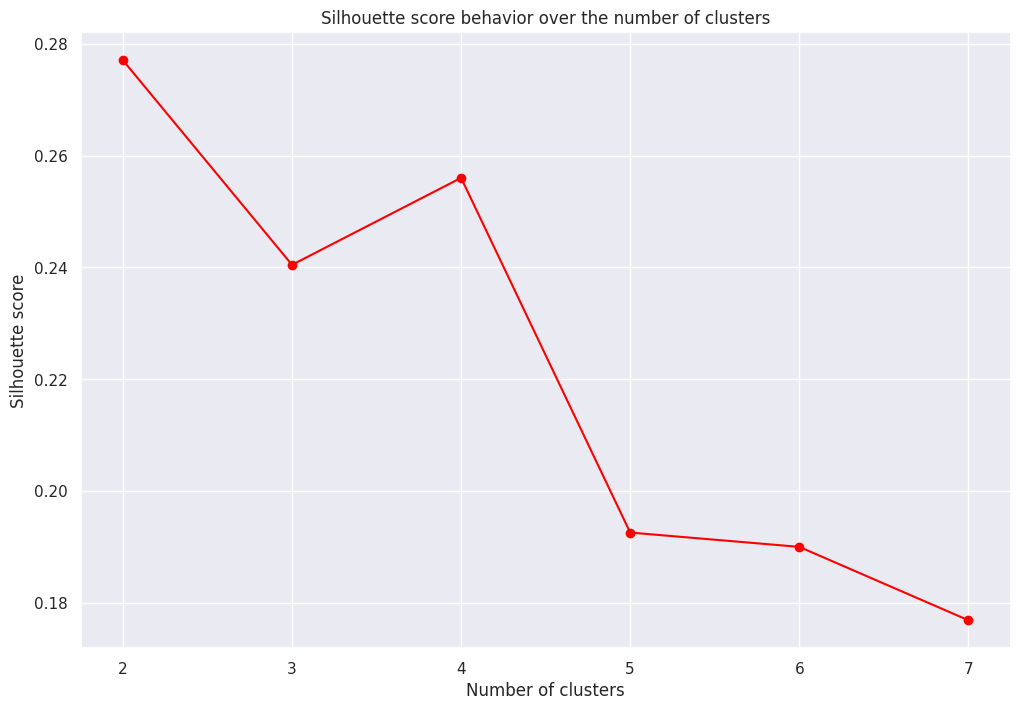

In [ ]:
#Silhouette score plot
plt.plot(n_clusters, sc, marker='.', markersize=12, color='red')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score behavior over the number of clusters')
plt.show()

In [ ]:
#Elbow method plot
for n, s in zip(n_clusters, ssd):
    print('Number of Clusters = {}, Sum of Squared Distances = {}'.format(n, s))

Number of Clusters = 2, Sum of Squared Distances = 6541.672974319783
Number of Clusters = 3, Sum of Squared Distances = 5779.807109088203
Number of Clusters = 4, Sum of Squared Distances = 5194.28482920814
Number of Clusters = 5, Sum of Squared Distances = 4804.624762422072
Number of Clusters = 6, Sum of Squared Distances = 4467.964560739512
Number of Clusters = 7, Sum of Squared Distances = 4245.244755772364


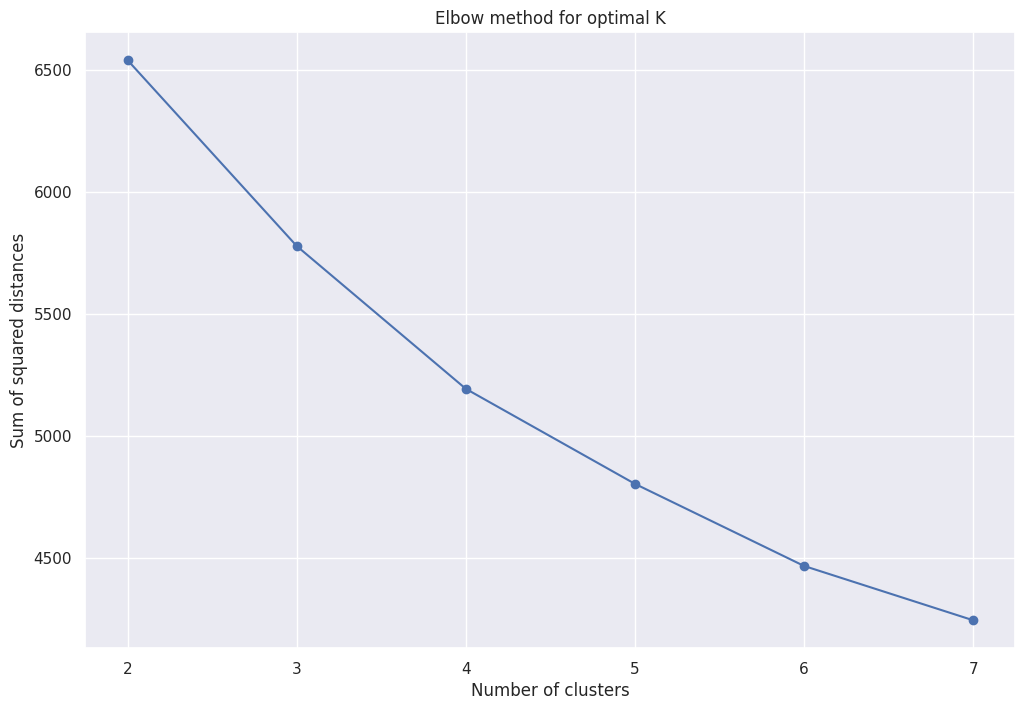

In [ ]:
plt.plot(n_clusters, ssd, marker='.', markersize=12)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K')
plt.show()

In [ ]:
k=4
model = KMeans(n_clusters=k, random_state=42).fit(songs_scaled)
pred = model.predict(songs_scaled)
print('10 first clusters: ', model.labels_[:10])

10 first clusters:  [1 1 1 1 0 2 0 2 1 1]


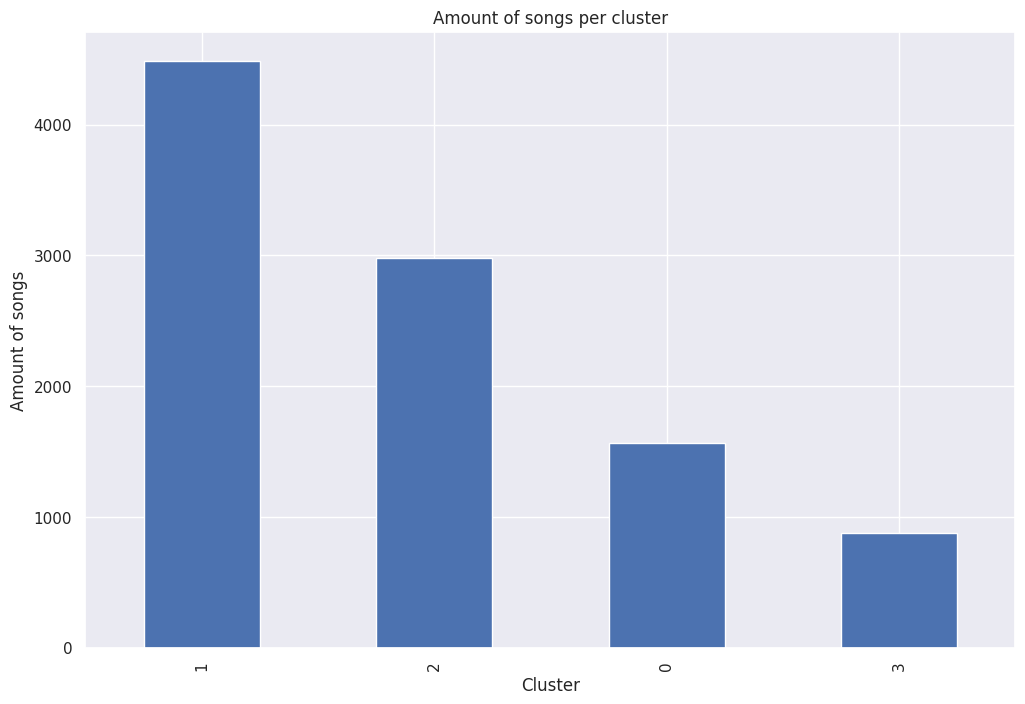

In [ ]:
df_songs_scaled['cluster'] = model.labels_

df_songs_scaled['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs per cluster')
plt.show()

In [ ]:
display(df_songs_scaled['cluster'].value_counts())
minor_cluster = df_songs_scaled['cluster'].value_counts().tail(1)
print("Amount of songs in the smallest cluster: ", int(minor_cluster.values))

1    4487
2    2976
0    1561
3     877
Name: cluster, dtype: int64

Amount of songs in the smallest cluster:  877


In [ ]:
k=4

model = KMeans(n_clusters=k, random_state=42).fit(songs_scaled)
pred = model.predict(songs_scaled)
print('10 first clusters: ', model.labels_[:10])

10 first clusters:  [1 1 1 1 0 2 0 2 1 1]


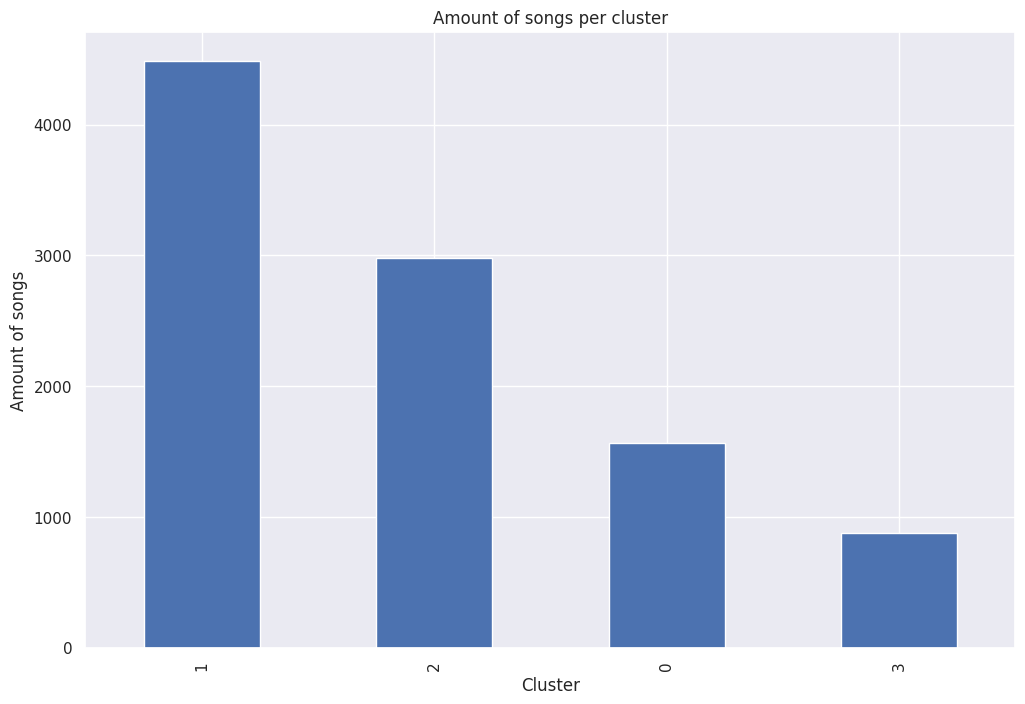

In [ ]:
df_songs_scaled['cluster'] = model.labels_

df_songs_scaled['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs per cluster')
plt.show()

In [ ]:
df_songs_joined = pd.concat([playlistDF,df_songs_scaled], axis=1).set_index('cluster')

for cluster in range(k):
    display(df_songs_joined.loc[cluster, ['all_artists','title','album_name']].sample(frac=1).head(10))

,all_artists,title,album_name
cluster,,,
0,Ben's Brother,Let Me Out,Let Me Out
0,P C III,Fortress,"Sgons, Vol. 1"
0,Faye,Screams and Dreams,Screams and Dreams
0,Teddy Sky,Fireproof,Fireproof
0,Willamette Stone,Heart Like Yours,If I Stay: Original Motion Picture Soundtrack:...
0,Kay Cook,Upgrade,Upgrade
0,Charles Vald,"Nature Sounds - Rain, Birds and Thunder (60 Mi...",The Sounds of Rain - 6 Hours of Nature Sounds
0,Kraftwerk,Autobahn,3-D The Catalogue
0,James Horner,Never an Absolution,Titanic: Original Motion Picture Soundtrack - ...


,all_artists,title,album_name
cluster,,,
1,Taylor & Mad.S,Omerta 2016,Omerta 2016
1,Janove,Me Vokser Aldri Opp,Artisten & Marlene
1,Taylor Swift,Enchanted,Speak Now
1,Kid Rock,All Summer Long,Rock n Roll Jesus
1,Trace Adkins,Hillbilly Bone,Cowboy's Back In Town (Deluxe Edition)
1,In Flames,Trigger,Reroute to Remain (Reissue 2014)
1,Jason Derulo,Whatcha Say,Jason Derulo (Deluxe Audio)
1,Janove,I Natt Blir Du Fri,Artisten & Marlene
1,Charlie Brown,Henpecked,The Strongest Man


,all_artists,title,album_name
cluster,,,
2,Annie Lennox,I Put A Spell On You,I Put A Spell On You
2,JENNIE,SOLO,SOLO
2,Nicky Romero,I Could Be The One (Avicii Vs. Nicky Romero) -...,I Could Be The One [Avicii vs Nicky Romero]
2,Amy Winehouse,Our Day Will Come,Lioness: Hidden Treasures
2,Forteba,Ain't Nothin - Feat. Todd Williams,Deep House
2,Bastille,Bad Blood,Bad Blood
2,Marshmello,Sing Me to Sleep - Marshmello Remix,Sing Me to Sleep
2,The Cure,Boys Don't Cry,Three Imaginary Boys
2,Bakar,Big Dreams,Badkid


,all_artists,title,album_name
cluster,,,
3,Tove Lo,Talking Body,Queen Of The Clouds
3,Staind,Change,Break the Cycle
3,Blue October,Hate Me,Foiled
3,XXXTENTACION,Falling Down - Bonus Track,Falling Down (Bonus Track)
3,The Notorious B.I.G.,Who Shot Ya? - 2007 Remaster,Greatest Hits
3,Death Grips,No Love,No Love Deep Web
3,Glass Animals,Take A Slice,How To Be A Human Being
3,Khalid,Seasons (feat. Khalid),East Atlanta Love Letter
3,Pantera,Walk,Vulgar Display of Power


###### Applying PCA to visualize the clusters

In [ ]:
pca = PCA(n_components=3, random_state=42)
songs_pca = pca.fit_transform(songs_scaled)
pca.explained_variance_ratio_.sum()


0.5571589526831334

In [ ]:
df_pca = pd.DataFrame(songs_pca, columns=['C1', 'C2', 'C3'])
df_pca['cluster'] = model.labels_
df_pca.head()

,C1,C2,C3,cluster
0,-0.369089,-0.103291,0.183379,1
1,-0.309729,-0.501823,-0.164496,1
2,-0.398227,-0.546084,0.410513,1
3,-0.280418,-0.638762,-0.297341,1
4,-0.410800,0.112326,0.176965,0


In [ ]:
#Undersampling clusters
sampled_clusters_pca = pd.DataFrame()

for c in df_pca.cluster.unique():
    df_cluster_sampled_pca = df_pca[df_pca.cluster == c].sample(n=int(minor_cluster), random_state=42)
    sampled_clusters_pca = pd.concat([sampled_clusters_pca,df_cluster_sampled_pca], axis=0)
sampled_clusters_pca.cluster.value_counts()

1    877
0    877
2    877
3    877
Name: cluster, dtype: int64

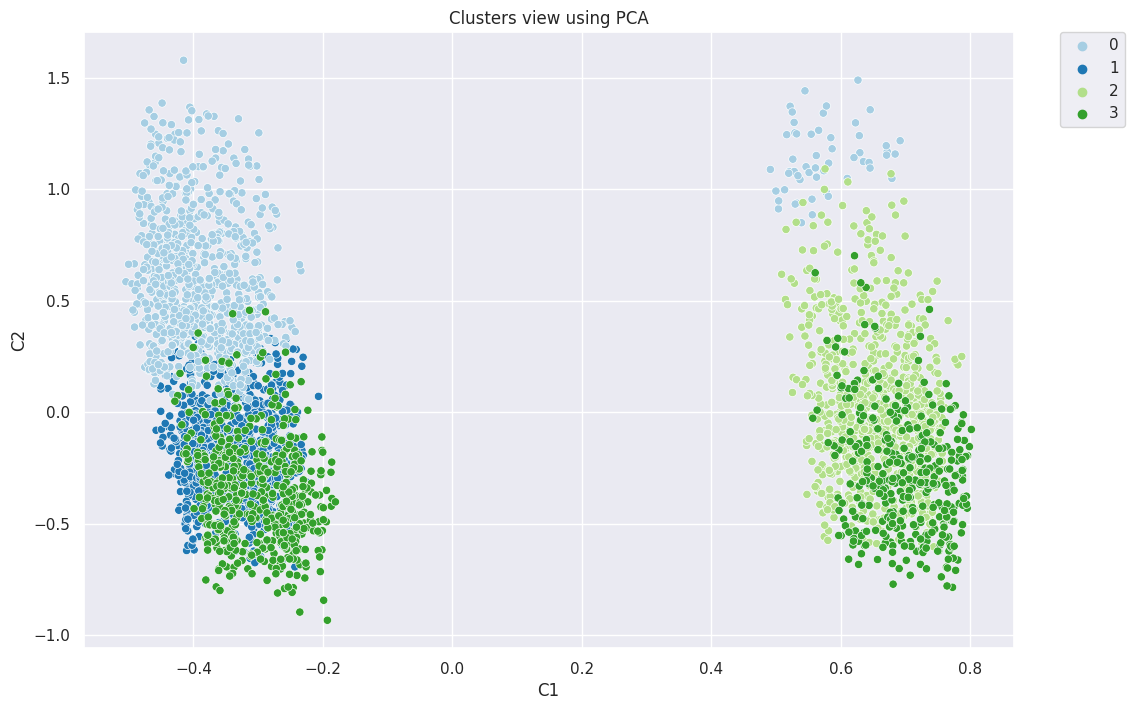

In [ ]:
#Visualizing clusters in 2 dimensions

sns.scatterplot(x='C1', y='C2', hue='cluster', data=sampled_clusters_pca, legend="full", palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using PCA')
plt.show()

In [ ]:
#Visualizing clusters in 3 dimensions
fig = plt.figure()
fig.suptitle('Clusters view with 3 dimensions using PCA')
ax = Axes3D(fig)

ax.scatter(df_pca['C1'], df_pca['C2'], df_pca['C3'],
           c=df_pca['cluster'], cmap='Paired')

ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_zlabel('C3')
plt.show()

<Figure size 1200x800 with 0 Axes>

###### Applying t-SNE to visualizing the clusters

In [ ]:
#tsne = TSNE(n_components=2, perplexity=50, n_iter=100, random_state=42, learning_rate=190)
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
songs_tsne = tsne.fit_transform(songs_scaled)

In [ ]:
df_tsne = pd.DataFrame(songs_tsne, columns=['C1', 'C2'])
df_tsne['cluster'] = model.labels_
df_tsne.head()

,C1,C2,cluster
0,1.478166,15.801890,1
1,-35.511589,-34.481472,1
2,-2.044168,-28.611538,1
3,-43.134937,-26.854790,1
4,-56.525826,5.251867,0


In [ ]:
sampled_clusters_tsne = pd.DataFrame()

for c in df_tsne.cluster.unique():
    df_cluster_sampled_tsne = df_tsne[df_tsne.cluster == c].sample(n=int(minor_cluster), random_state=42)
    sampled_clusters_tsne = pd.concat([sampled_clusters_tsne,df_cluster_sampled_tsne], axis=0)
sampled_clusters_tsne.cluster.value_counts()

1    877
0    877
2    877
3    877
Name: cluster, dtype: int64

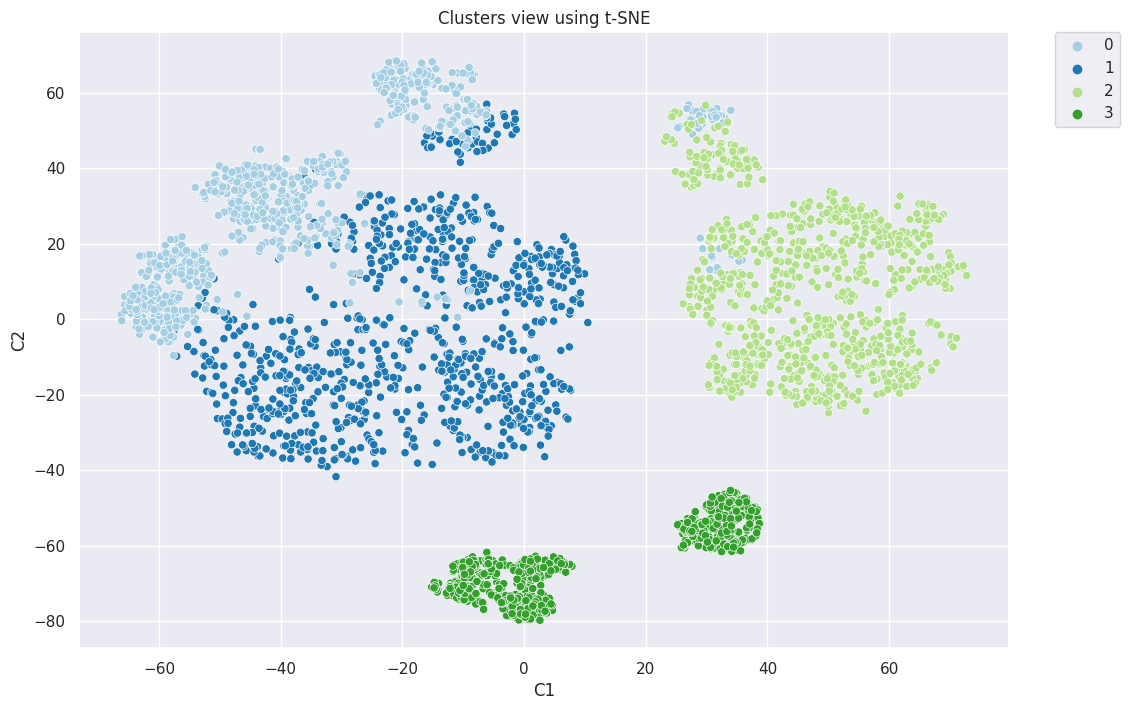

In [ ]:
sns.scatterplot(x='C1', y='C2', hue='cluster', data=sampled_clusters_tsne, legend="full", palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using t-SNE')
plt.show()

###### Predicting users clusters

In [ ]:
user_pred = model.predict(user_scaled)
print('20  users clusters: ', user_pred[:20])

20  users clusters:  [1 2 1 2 1 1 1 1 1 0 1 1 1 0 1 1 0 2 1 1]


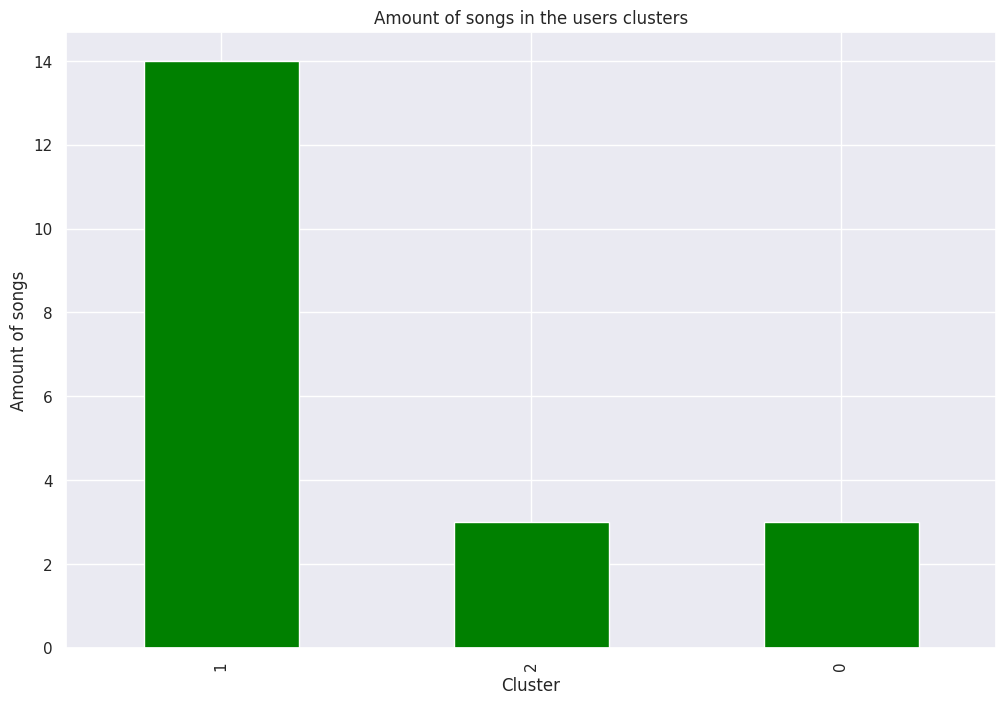

In [ ]:
user_cluster = pd.DataFrame(user_scaled, columns=columns_to_cluster_scaled)
user_cluster['cluster'] = user_pred

user_cluster['cluster'].value_counts().plot(kind='bar', color='green')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs in the users clusters')
plt.show()

In [ ]:
#Sample of songs in each cluster
df_user_songs_joined = pd.concat([playlistDF_test,user_cluster], axis=1).set_index('cluster')
for cluster in user_cluster['cluster'].unique():
    display(df_user_songs_joined.loc[cluster, ['all_artists','title','album_name']].sample(frac=1).head(10))

,all_artists,title,album_name
cluster,,,
1,Miley Cyrus,The Climb,Hannah Montana The Movie
1,Taylor Swift,I Know Places,1989 (Deluxe Edition)
1,Taylor Swift,The Outside,Taylor Swift
1,Taylor Swift,Crazier,Hannah Montana The Movie
1,Taylor Swift,Treacherous,Red (Deluxe Edition)
1,Taylor Swift,Long Live,Speak Now
1,Taylor Swift,The Lucky One,Red
1,Taylor Swift,Gorgeous,reputation
1,Taylor Swift,22,Red


,all_artists,title,album_name
cluster,,,
2,SZA,What Lovers Do (feat. SZA),Red Pill Blues (Deluxe)
2,Taylor Swift,Look What You Made Me Do,reputation
2,Taylor Swift,I Did Something Bad,reputation


,all_artists,title,album_name
cluster,,,
0,RHODES,Let It All Go,Let It All Go
0,Colbie Caillat,Breathe,Fearless
0,Taylor Swift,State Of Grace - Acoustic,Red (Deluxe Edition)


###### **Recomend song**

In [ ]:
#Analysing the percentage of songs per cluster
df_user_songs_joined.reset_index(inplace=True)
cluster_pct = df_user_songs_joined.cluster.value_counts(normalize=True)*100
display(cluster_pct)
print('Total songs: ', int(cluster_pct.round(0).sum()))

1    70.0
2    15.0
0    15.0
Name: cluster, dtype: float64

Total songs:  100


In [ ]:
df_songs_joined.reset_index(inplace=True)
df_songs_joined.head(3)

,index,cluster,id,title,all_artists,album_name,popularity,release_date,explicit,speechiness,...,valence_scaled,tempo_scaled,speechiness_scaled,loudness_scaled,popularity_scaled,explicit_scaled,key_scaled,mode_scaled,time_signature_scaled,artist_pop_scaled
0,0,1,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,Taylor Swift,...Ready For It?,0,2017-09-03,False,0.1350,...,0.457576,0.666370,0.141066,0.883785,0.000000,0.0,0.181818,1.0,0.8,1.00
1,1,1,4Vxu50qVrQcycjRyJQaZLC,Life Changes,Thomas Rhett,Life Changes,60,2017-09-08,False,0.0576,...,0.817172,0.366387,0.060188,0.922987,0.681818,0.0,0.636364,1.0,0.8,0.75
2,2,1,6b8Be6ljOzmkOmFslEb23P,24K Magic,Bruno Mars,24K Magic,77,2016-11-17,False,0.0797,...,0.638384,0.445510,0.083281,0.924643,0.875000,0.0,0.090909,1.0,0.8,0.90


In [ ]:
#Adding the percentage to the users dataset
df_user_songs_joined['cluster_pct'] = df_user_songs_joined['cluster'].apply(lambda c: cluster_pct[c])
df_user_songs_joined.drop(columns=columns_to_cluster_scaled, inplace=True)
df_user_songs_joined.head(3)

,cluster,Unnamed: 0,id,title,all_artists,album_name,popularity,release_date,explicit,speechiness,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genres,artist_pop,genres_list,cluster_pct
0,1,51,0CLnkxpa3M4eA3HeGaERat,Gorgeous,Taylor Swift,Gorgeous,0,10/20/2017,False,0.1690,...,0.000005,0.2270,0.418,92.022,209680,4,pop,100,[pop],70.0
1,2,212,4nYsmWkuTaowTMy4gskmBw,What Lovers Do (feat. SZA),SZA,Red Pill Blues (Deluxe),0,11/03/2017,False,0.0693,...,0.000004,0.0852,0.420,109.959,199849,4,pop,87,[pop],15.0
2,1,247,0V8FYVlBFuXXTIvRnMbZyS,The Climb,Miley Cyrus,Hannah Montana The Movie,67,01/01/2009,False,0.0336,...,0.000000,0.1040,0.329,161.074,236067,4,pop,93,[pop],70.0


In [ ]:
#Getting mixed samples from the original dataset and inserting in a new playlist, based on the percentage of songs present in each user cluster
playlist = pd.DataFrame()

for ncluster, pct in cluster_pct.items():
    songs = df_songs_joined[df_songs_joined['cluster'] == ncluster].sample(n=int(round(pct, 0)))
    playlist = pd.concat([playlist,songs], ignore_index=True)
    if len(playlist) > 10 :
        flag = 10 - len(playlist)
        playlist = playlist[:flag]

playlist = playlist[['all_artists','title','album_name','genres_list']]

In [ ]:
playlist

,all_artists,title,album_name,genres_list
0,Sugar Ray,When It's Over - David Kahne Main,Sugar Ray,"[alternative_metal, alternative_rock, funk_met..."
1,LOONA/yyxy,love4eva (feat. Grimes),beauty&thebeat,[k-pop_girl_group]
2,Bombay Bicycle Club,Shuffle,A Different Kind Of Fix,"[alternative_dance, british_indie_rock, indie_..."
3,George Ezra,Pretty Shining People,Staying at Tamara's,"[folk-pop, neo-singer-songwriter]"
4,Bruno Mars,Nothin' on You (feat. Bruno Mars),B.o.B Presents: The Adventures of Bobby Ray,"[atl_hip_hop, dance_pop, hip_hop, pop, pop_rap..."
5,Flyleaf,Traitor,Between The Stars,"[alternative_metal, christian_alternative_rock..."
6,The Doors,Roadhouse Blues,Morrison Hotel,"[acid_rock, album_rock, classic_rock, psychede..."
7,Reel Big Fish,Your Girlfriend Sucks,Candy Coated Fury,"[modern_ska_punk, pop_punk, punk, ska, ska_pun..."
8,Quinn XCII,Always Been You,The Story of Us,"[electropop, indie_pop_rap, pop, pop_rap]"
9,Galantis,Runaway (U & I),Pharmacy,"[dance_pop, edm, electro_house, pop, pop_dance..."


## **Recomendation system dựa trên playlist và rating của user cho từng bài hát**

**Thông tin 229 bài hát (tất cả đều là thể loại pop)**

In [ ]:
user = pd.read_csv('user_playlists.csv')
user.drop(columns = ['Unnamed: 0'],inplace = True)
user.head(5)

,id,title,all_artists,album_name,popularity,release_date,explicit,speechiness,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genres,artist_pop,genres_list
0,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,Taylor Swift,...Ready For It?,0,2017-09-03,False,0.1350,0.615,0.779,2,-6.454,1,0.06650,0.000000,0.1550,0.453,160.000,208198,4,pop,100,[pop]
1,3PGdPUMdUg7a3Tgr5gkfKK,Don't Wanna Know (feat. Kendrick Lamar),Kendrick Lamar,Red Pill Blues (Deluxe),0,2017-11-03,False,0.0670,0.776,0.620,7,-6.198,1,0.34100,0.000000,0.0978,0.427,100.025,214265,4,pop,87,[pop]
2,7AEAGTc8cReDqcbPoY9gwo,We Are Never Ever Getting Back Together,Taylor Swift,Red,57,2012-10-22,False,0.0916,0.628,0.676,7,-5.911,1,0.00957,0.000027,0.1020,0.750,85.984,191880,4,pop,100,[pop]
3,273dCMFseLcVsoSWx59IoE,Bad Blood,Taylor Swift,1989,66,2014-10-27,False,0.1810,0.650,0.802,7,-6.114,1,0.08710,0.000007,0.1480,0.295,170.146,211933,4,pop,100,[pop]
4,1LmN9SSHISbtp9LoaR5ZVJ,Payphone,Wiz Khalifa,Overexposed,67,2021-06-20,True,0.0394,0.739,0.756,4,-4.828,1,0.01360,0.000000,0.3700,0.523,110.028,231387,4,pop,87,[pop]


In [ ]:
import re

bad_indices = [] 

lst_4_years = [] 
lst_2_slash = [] 
lst_2_hyphen = [] 

lst_year_release = [] 

for i, date in enumerate(user.release_date):

    if len(date)==4:
        lst_4_years.append(date)
        lst_year_release.append(date)
        
    elif re.findall(r"(.){1,2}[/](.){1,2}[/](.){1,2}",date): 
        lst_2_slash.append(date)
        
        if int(date[-2:]) < 19: 
            lst_year_release.append("20"+(date[-2:]))
        else:
            lst_year_release.append("19"+(date[-2:])) 
        
    elif re.findall(r"(.){4}-(.){2}",date):
        lst_2_hyphen.append(date)
        lst_year_release.append(date[:4])
        
    else:
        bad_indices.append((i, date))
        
print(len(bad_indices)) 
user["release_year"] = lst_year_release

0


In [ ]:
user_database = user.drop(['all_artists','album_name', 'release_date', 'id', 'title', 'genres','genres_list'], axis=1)
user_database.shape

(229, 17)

In [ ]:
user_database_main = user_database.copy() 

del user_database["explicit"]
del user_database["mode"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(user_database)
user_database_scaled = scaler.transform(user_database)
user_database_scaled = pd.DataFrame(user_database_scaled)
user_database_scaled.columns = user_database.columns

user_database_scaled["explicit"] = user_database_main["explicit"]
user_database_scaled["mode"] = user_database_main["mode"]

In [ ]:
user_database_scaled.head()

,popularity,speechiness,danceability,energy,key,loudness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_pop,release_year,explicit,mode
0,-2.041311,2.331627,0.051764,0.795311,-0.868207,-0.042527,-0.492072,-0.119224,-0.009940,0.061013,1.273448,-0.668293,0.167506,0.623578,1.245291,False,1
1,-2.041311,0.435653,1.405311,-0.065540,0.702247,0.062335,0.574458,-0.119224,-0.510531,-0.062314,-0.745224,-0.504762,0.167506,-0.913170,1.245291,False,1
2,0.401861,1.121549,0.161057,0.237653,0.702247,0.179894,-0.713266,-0.118928,-0.473774,1.469796,-1.217824,-1.108129,0.167506,0.623578,-0.041585,False,1
3,0.787625,3.614198,0.346014,0.919836,0.702247,0.096742,-0.412034,-0.119151,-0.071201,-0.688440,1.614948,-0.567619,0.167506,0.623578,0.473166,False,1
4,0.830487,-0.333890,1.094248,0.670785,-0.240026,0.623506,-0.697608,-0.119224,1.871652,0.393050,-0.408537,-0.043255,0.167506,-0.913170,2.274792,True,1


**20 bài hát mà user nghe trong 229 bài nhạc trên**

In [ ]:
indices = np.arange(user_database_scaled.shape[0])
random_indices = np.random.choice(indices, size=20, replace=False)
helen_X = user_database_scaled.loc[random_indices]
indices = [index for index in helen_X.index]
top_ids = user.loc[indices].id.values
for track_id in top_ids:
    print('https://open.spotify.com/track/{}'.format(track_id))

https://open.spotify.com/track/0CLnkxpa3M4eA3HeGaERat
https://open.spotify.com/track/6XDBA3QWX51lDJ0oZbaJJN
https://open.spotify.com/track/5P4wWhUYWM0IaVYLuZxdar
https://open.spotify.com/track/49mWEy5MgtNujgT7xU3emT
https://open.spotify.com/track/5vyxXfD5gLlyPxGZMEjtmd
https://open.spotify.com/track/28M2gifMU282QBM3fKajIS
https://open.spotify.com/track/4lIxdJw6W3Fg4vUIYCB0S5
https://open.spotify.com/track/2X2J0BhxaLTmnxO4pPUhSd
https://open.spotify.com/track/4svZDCRz4cJoneBpjpx8DJ
https://open.spotify.com/track/5G9AVKld9q7DCrmoY42raf
https://open.spotify.com/track/4nYsmWkuTaowTMy4gskmBw
https://open.spotify.com/track/5ybJm6GczjQOgTqmJ0BomP
https://open.spotify.com/track/1P17dC1amhFzptugyAO7Il
https://open.spotify.com/track/0XfOV7qY3834QpFVwOb6CC
https://open.spotify.com/track/2zfgVd034GlUvk7LqBHl6u
https://open.spotify.com/track/4WXzzCof26KJLTK5kK53dS
https://open.spotify.com/track/1ZY1PqizIl78geGM4xWlEA
https://open.spotify.com/track/70K0ezmzYEZeqoSaZMyP7o
https://open.spotify.com/tra

**Điểm mà user chấm cho 20 bài hát trên**

In [ ]:
user_y = [8, 7.5, 8, 9, 6.5, 7.5, 7, 6, 9, 6, 7, 4, 9, 6, 8, 3, 6, 7.5, 6, 8.5]

**1. LinearRegresion**

In [ ]:
simple_LR_model = LinearRegression().fit(helen_X, user_y)
preds_LR = simple_LR_model.predict(X_database_scaled)
database_full = X_database_scaled.copy() # df to hold both predictors and predicted ratings
database_full['predicted_ratings'] = preds_LR
database_sorted = database_full.sort_values(by=['predicted_ratings']) # sort from worst to best ratings
top5_lr = database_sorted[database_sorted.shape[0] - 5:] # top 5 ratings (this number can be increased to get more songs)
top5_lr

,popularity,speechiness,danceability,energy,key,loudness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_pop,release_year,explicit,mode,predicted_ratings
9383,-1.139116,-0.410724,-3.026312,-2.270747,-1.178500,-1.623131,2.570676,3.412106,-0.622464,-1.760279,-1.732092,1.486016,0.181937,0.233836,0.952579,False,0.0,49.651816
4968,0.497009,-0.404029,-3.058559,-2.648802,1.052656,-3.620443,2.369726,3.677548,-0.773944,-1.383726,-1.983659,-0.289141,0.181937,0.049993,-0.164825,False,0.0,49.690969
5969,-0.521024,-0.436163,-2.861426,-1.638412,-0.899605,-1.201866,2.082159,3.546934,-0.642052,-1.725532,-1.159478,-0.020181,0.181937,-0.011288,0.350900,False,0.0,49.915663
5959,0.787876,-0.474992,-2.176325,-2.140692,-0.620711,-1.932382,2.518706,3.542720,-0.536277,-1.678665,-0.492465,0.141833,0.181937,0.907925,0.608762,False,0.0,50.174182
7090,0.387934,-0.359845,-2.907058,-2.216931,0.215973,-2.216458,2.428625,3.761815,-0.758927,-1.796641,-1.658793,-0.286803,3.169178,-0.440254,0.007083,False,1.0,50.677639


In [ ]:
indices = [index for index in top5_lr.index]
top_ids = df.loc[indices].id.values
top_gen = df.loc[indices].genres.values
top_title = df.loc[indices].title.values
df_top = pd.DataFrame({'id': top_ids, 'genres': top_gen, 'title': top_title})

In [ ]:
df_top

,id,genres,title
0,0Vc8lKVpeK7SeUULvYVncH,australian_indie,Love Letter
1,4w0mTXaAAMhNH4qF0fniCC,deep_groove_house house pop_dance tropical_hou...,Touch
2,21AHQlJa5Q0s1Jx2PeulUD,brostep dance_pop edm electro_house electronic...,Love in the Middle of a Firefight (feat. Brend...
3,05wFHt1ZAsFU8GKbHV7nxo,alternative_rock anti-folk art_rock baroque_po...,The Party Line
4,5jOMxC9ezgFPGSMSn1zJ5S,permanent_wave punk,Peacemaker


In [ ]:
print(set(df_top['genres']))

{'deep_groove_house house pop_dance tropical_house uk_dance', 'alternative_rock anti-folk art_rock baroque_pop britpop chamber_pop indie_pop indie_rock melancholia pop_rock scottish_indie scottish_rock twee_pop', 'permanent_wave punk', 'brostep dance_pop edm electro_house electronic_trap electropop house moombahton pop pop_dance slap_house tropical_house', 'australian_indie'}


**Kết quả của mô hình LinearRegression cho ra 3 bài thể loại nhạc pop trong top 5 => khá thấp so với kỳ vọng**

**2. RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

est_rf = RandomForestRegressor(random_state=15).fit(helen_X, user_y)
preds_rf = est_rf.predict(X_database_scaled)

database_rf = X_database_scaled.copy()
database_rf['predicted_ratings'] = preds_rf

database_rf_sorted = database_rf.sort_values(by=['predicted_ratings'])
top5_rf = database_rf_sorted[database_rf_sorted.shape[0]-5:]
top5_rf

,popularity,speechiness,danceability,energy,key,loudness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_pop,release_year,explicit,mode,predicted_ratings
3150,1.478684,3.366364,-0.046794,0.106114,0.215973,-0.014057,1.108589,-0.392560,-0.451396,-0.632237,-1.110636,-0.296497,0.181937,0.540240,0.866624,False,1.0,8.345
7575,1.151459,-0.353151,-0.052878,0.541124,-1.178500,0.590356,0.259747,-0.392560,-0.523218,-0.591835,-1.195432,-0.135976,0.181937,0.969206,0.522808,False,0.0,8.350
3283,1.624117,2.081002,-0.770834,-0.257142,-1.457395,-0.322846,0.339434,-0.384217,-0.536277,-0.506989,1.596444,-0.286088,0.181937,1.459453,0.780670,False,0.0,8.420
5110,1.587759,2.750461,-0.326675,-0.046364,-1.178500,-0.287741,-0.131759,-0.392463,-0.583288,-0.721123,-1.136700,-0.130618,0.181937,2.010980,0.866624,False,1.0,8.430
3064,1.078742,-0.066622,0.263509,-0.871538,-1.457395,0.123131,1.118983,-0.392555,-0.353456,-0.397902,-2.173031,-0.180660,0.181937,1.275610,0.866624,True,0.0,8.440


In [ ]:
indices = [index for index in top5_rf.index]
top_ids = df.loc[indices].id.values
top_gen = df.loc[indices].genres.values
top_title = df.loc[indices].title.values
df_top = pd.DataFrame({'id': top_ids, 'genres': top_gen, 'title': top_title})

In [ ]:
df_top

,id,genres,title
0,4Tid4MwqgR1CfKCun3tFon,electropop indie_poptimism pop pop_dance pop_e...,Kings of Summer - Single Version
1,2lYTJK94hb0fd1LQtb6Dhk,big_room dance_pop edm pop pop_dance,Don't Leave Me Alone (feat. Anne-Marie)
2,0iwsQWgtjSq2kUXuZwTDAL,alt_z dance_pop pop post-teen_pop,Home with You
3,715sEYWkafd4xvl87dwZgu,album_rock classic_rock mellow_gold new_wave_p...,The Heart Of Rock And Roll
4,2RjpDxBii8EvC6p6wxwCSz,pop,Harder To Breathe


In [ ]:
print(set(df_top['genres']))

{'pop', 'big_room dance_pop edm pop pop_dance', 'electropop indie_poptimism pop pop_dance pop_edm tropical_house', 'album_rock classic_rock mellow_gold new_wave_pop pop_rock rock soft_rock', 'alt_z dance_pop pop post-teen_pop'}


**Kết quả của mô hình RandomForestRegressor cho ra 4 bài hát trong top 5 đều là thể loại nhạc pop => mô hình hoạt động khá tốt**

**Keras Neural Network**

In [ ]:
helen_X_nn = np.array(helen_X, dtype=np.float32)
user_y_nn = np.array(user_y, dtype=np.float32)

In [ ]:
model = Sequential([
    Dense(200, input_shape=(17,), activation='relu'), 
    Dense(150, activation='relu'), 
    Dense(100, activation='relu'), 
    Dense(1, activation='relu') 
])

In [ ]:
model.compile(loss='mean_absolute_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               3600      
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 100)               15100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 48,951
Trainable params: 48,951
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(helen_X_nn, user_y_nn, epochs=50, batch_size=32, validation_split = .2) 

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 6.9436 - val_loss: 6.9157
Epoch 2/50
1/1 [==============================] - 0s 59ms/step - loss: 6.7998 - val_loss: 6.7391
Epoch 3/50
1/1 [==============================] - 0s 85ms/step - loss: 6.6064 - val_loss: 6.5411
Epoch 4/50
1/1 [==============================] - 0s 57ms/step - loss: 6.4053 - val_loss: 6.3274
Epoch 5/50
1/1 [==============================] - 0s 79ms/step - loss: 6.1986 - val_loss: 6.1038
Epoch 6/50
1/1 [==============================] - 0s 37ms/step - loss: 5.9799 - val_loss: 5.8656
Epoch 7/50
1/1 [==============================] - 0s 37ms/step - loss: 5.7448 - val_loss: 5.6030
Epoch 8/50
1/1 [==============================] - 0s 55ms/step - loss: 5.4872 - val_loss: 5.3094
Epoch 9/50
1/1 [==============================] - 0s 41ms/step - loss: 5.2035 - val_loss: 4.9895
Epoch 10/50
1/1 [==============================] - 0s 35ms/step - loss: 4.8864 - val_loss: 4.6424
Epoch 11/50
1/1 [==============

In [ ]:
X_database_scaled_1 = np.array(X_database_scaled, dtype=np.float32)

In [ ]:
preds_nn = model.predict(X_database_scaled_1)

282/282 [==============================] - 0s 1ms/step


In [ ]:
database_nn = X_database_scaled.copy()
database_nn['predicted_ratings'] = preds_nn

database_nn_sorted = database_nn.sort_values(by=['predicted_ratings'])
top5_nn = database_nn_sorted[database_nn_sorted.shape[0]-5:]
top5_nn

,popularity,speechiness,danceability,energy,key,loudness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_pop,release_year,explicit,mode,predicted_ratings
9393,-1.139116,11.185644,-1.476622,1.518776,0.773762,-2.312536,2.147988,3.441600,5.052824,-1.806742,-1.408261,5.927943,3.169178,-1.910994,0.522808,False,0.0,18.616995
9251,-1.102758,-0.322355,-3.029963,-0.997108,-1.457395,-2.443719,2.584535,2.881223,-0.648581,-1.821287,-1.519799,15.995140,-8.779787,-0.072569,0.522808,False,1.0,18.646547
9310,-1.139116,10.757191,-1.403609,1.173458,-0.899605,-2.479056,1.112054,-0.391397,1.807750,-1.492813,-0.461581,5.928035,3.169178,-1.910994,0.522808,False,1.0,18.777977
9273,-0.957324,11.319536,-2.066806,0.559063,1.052656,-3.453461,2.158382,2.704261,1.461696,-1.774824,-1.401691,11.336278,3.169178,-0.072569,0.436854,False,1.0,19.013981
9253,-0.993683,10.476018,-1.945119,1.447022,-1.178500,-4.732036,2.203422,3.593281,4.889591,-1.881123,-1.652295,15.993650,0.181937,-0.072569,0.522808,False,1.0,21.718258


In [ ]:
indices = [index for index in top5_nn.index]
top_ids = df.loc[indices].id.values
top_gen = df.loc[indices].genres.values
top_title = df.loc[indices].title.values
df_top = pd.DataFrame({'id': top_ids, 'genres': top_gen, 'title': top_title})
df_top

,id,genres,title
0,15Trb1S2FDZSMLDzWfnlbg,irish_rock pop_rock,Promises
1,5BhMoGrz5KzG2fA5uzHjZ1,beatlesque british_invasion classic_rock merse...,Don't Let Me Down - Naked Version / Remastered...
2,5clz8BOBulxx7q2yHxqOCk,album_rock birmingham_metal classic_rock hard_...,Children of the Grave - 2014 Remaster
3,1febXMopmNMoPDsOLAbAP3,black_metal death_metal metal pagan_black_meta...,No Sympathy For Fools
4,48JM82SHQTBYkhEYhMaOaa,beatlesque british_invasion classic_rock merse...,She Loves You - Remastered 2009


In [ ]:
print(set(df_top['genres']))

{'beatlesque british_invasion classic_rock merseybeat psychedelic_rock rock', 'black_metal death_metal metal pagan_black_metal polish_black_metal polish_death_metal polish_metal', 'album_rock birmingham_metal classic_rock hard_rock metal rock stoner_rock uk_doom_metal', 'irish_rock pop_rock'}


**Mô hình Neraul network cho ra 1 bài thể loại pop trong top 5 bài có predict_ratings cao => mô hình không hiệu quả**

## **Recomendation system dựa trên playlist mà user thích (không cần ratings)**

In [ ]:
df_non_ratings = pd.read_csv('user_liked.csv')
df_non_ratings.drop(columns = ['Unnamed: 0'],inplace = True)
df_non_ratings = df_non_ratings.dropna(axis = 0)
df_non_ratings

,id,title,all_artists,album_name,popularity,release_date,explicit,speechiness,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genres,artist_pop,genres_list,Liked
0,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,Taylor Swift,...Ready For It?,0,2017-09-03,False,0.1350,0.615,0.779,2,-6.454,1,0.06650,0.000000,0.1550,0.453,160.000,208198,4,pop,100,[pop],1
1,4Vxu50qVrQcycjRyJQaZLC,Life Changes,Thomas Rhett,Life Changes,60,2017-09-08,False,0.0576,0.687,0.845,7,-4.370,1,0.10000,0.000000,0.0452,0.809,87.972,190227,4,contemporary_country country country_road,75,"[contemporary_country, country, country_road]",0
2,6b8Be6ljOzmkOmFslEb23P,24K Magic,Bruno Mars,24K Magic,77,2016-11-17,False,0.0797,0.818,0.803,1,-4.282,1,0.03400,0.000000,0.1530,0.632,106.970,225983,4,dance_pop pop,90,"[dance_pop, pop]",1
3,0afhq8XCExXpqazXczTSve,Galway Girl,Ed Sheeran,÷ (Deluxe),77,2017-03-03,False,0.1000,0.624,0.876,9,-3.374,1,0.07350,0.000000,0.3270,0.781,99.943,170827,4,pop uk_pop,92,"[pop, uk_pop]",1
4,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,Ed Sheeran,x (Deluxe Edition),83,2014-06-21,False,0.0476,0.614,0.379,4,-10.480,1,0.60700,0.000464,0.0986,0.201,107.989,258987,4,pop uk_pop,92,"[pop, uk_pop]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9436,4UFlPCB4THnQ9TlPHqIQow,Funeral For A Friend / Love Lies Bleeding,Elton John,Goodbye Yellow Brick Road (40th Anniversary Ce...,0,1973-10-05,False,0.0465,0.410,0.761,9,-8.507,0,0.01980,0.084700,0.2470,0.193,138.712,666572,4,glam_rock mellow_gold piano_rock,85,"[glam_rock, mellow_gold, piano_rock]",0
9437,5pSSEkT0963muzzIjsVkrs,Fool's Overture,Supertramp,Even In The Quietest Moments,50,1977-01-01,False,0.0372,0.406,0.306,3,-10.482,1,0.31300,0.007900,0.0727,0.073,135.272,652560,4,album_rock art_rock classic_rock glam_rock mel...,71,"[album_rock, art_rock, classic_rock, glam_rock...",1
9438,7gC6Rbllqf1yXNC02e5jz2,Heart of the Sunrise - 2003 Remaster,Yes,Fragile (Deluxe Edition),44,1971-11-26,False,0.0394,0.362,0.507,1,-11.229,1,0.01740,0.216000,0.1130,0.456,146.641,634440,3,album_rock art_rock classic_rock jazz_fusion p...,62,"[album_rock, art_rock, classic_rock, jazz_fusi...",1
9439,6Ff77WXC58MkhLE5A1qgY1,Venus And Mars / Rock Show / Jet - Live / Rema...,Wings,Wings Over America (Remastered),0,1976-12-10,False,0.0468,0.331,0.733,2,-8.671,1,0.08870,0.001740,0.9470,0.380,128.512,620747,4,album_rock art_rock beatlesque classic_rock fo...,72,"[album_rock, art_rock, beatlesque, classic_roc...",1


**Ở đây ta sẽ giả định cột Liked với 1 là ý thể hiện user thích bài hát và 0 là thể hiện user không thích bài hát**

In [ ]:
import random
for i in range(len(df_non_ratings)):
    df_non_ratings.loc[i, 'Liked'] = random.choices([0, 1], [1 - probability_of_one, probability_of_one])[0]

In [ ]:
df_non_ratings['Liked'].value_counts()

1    7591
0    1850
Name: Liked, dtype: int64

In [ ]:
df_non_ratings.to_csv('user_liked.csv')

**=> Chúng ta có 1850 bài hát user không thích và 7591 bài hát mà user thích**

**Tiến hành drop những cột không sử dụng**

In [ ]:
import re

bad_indices = [] 

lst_4_years = [] 
lst_2_slash = [] 
lst_2_hyphen = [] 

lst_year_release = [] 

for i, date in enumerate(df_non_ratings.release_date):

    if len(date)==4: 
        lst_4_years.append(date)
        lst_year_release.append(date)
        
    elif re.findall(r"(.){1,2}[/](.){1,2}[/](.){1,2}",date): 
        lst_2_slash.append(date)
        
        if int(date[-2:]) < 19: 
            lst_year_release.append("20"+(date[-2:]))
        else:
            lst_year_release.append("19"+(date[-2:])) 
        
    elif re.findall(r"(.){4}-(.){2}",date): 
        lst_2_hyphen.append(date)
        lst_year_release.append(date[:4])
        
    else:
        bad_indices.append((i, date))
        
print(len(bad_indices)) # there are no bad indices :) that means all release dates were in one of the above 3 formats
df_non_ratings["release_year"] = lst_year_release

0


In [ ]:
df_scale = df_non_ratings.drop(['all_artists','album_name', 'release_date', 'id', 'title', 'genres','genres_list','key'], axis=1)
df_scale.shape

(9441, 17)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df_scale['explicit'] = le.fit_transform(df_scale.explicit)
df_scale.explicit.value_counts()

0    8588
1     853
Name: explicit, dtype: int64

In [ ]:
db = df_scale.copy() 

del df_scale["explicit"]
del df_scale["mode"]
del df_scale["Liked"]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_scale)
df_scalee = scaler.transform(df_scale)
df_scalee = pd.DataFrame(df_scalee)
df_scalee.columns = df_scale.columns
df_scalee["Liked"] = db["Liked"]
df_scalee["mode"] = db["mode"]
df_scalee["explicit"] = db["explicit"]

In [ ]:
df_scalee

,popularity,speechiness,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_pop,release_year,Liked,mode,explicit
0,-1.139116,0.875976,0.287847,0.550093,0.261705,-0.583898,-0.392560,-0.196752,-0.090842,1.410357,-0.200322,0.181937,2.072261,0.780670,1,1,0
1,1.042384,-0.160346,0.725922,0.846080,0.743018,-0.467832,-0.392560,-0.913672,1.347492,-1.161299,-0.250568,0.181937,0.540240,0.780670,0,1,0
2,1.660475,0.135554,1.522975,0.657725,0.763342,-0.696499,-0.392560,-0.209811,0.632365,-0.483003,-0.150596,0.181937,1.459453,0.694716,1,1,0
3,1.660475,0.407355,0.342606,0.985104,0.973051,-0.559645,-0.392560,0.926292,1.234364,-0.733892,-0.304809,0.181937,1.582014,0.780670,1,1,0
4,1.878625,-0.294238,0.281762,-1.243764,-0.668126,1.288752,-0.390605,-0.565006,-1.108988,-0.446621,-0.058318,0.181937,1.582014,0.522808,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9436,-1.139116,-0.308966,-0.959450,0.469370,-0.212449,-0.745697,-0.035688,0.403946,-1.141310,0.650299,1.081271,0.181937,1.153048,-3.001311,0,0,0
9437,0.678801,-0.433486,-0.983787,-1.571142,-0.668588,0.270141,-0.359274,-0.734115,-1.626142,0.527479,1.042094,0.181937,0.295117,-2.657495,1,1,0
9438,0.460651,-0.404029,-1.251500,-0.669729,-0.841112,-0.754013,0.517527,-0.470984,-0.078721,0.933393,0.991432,-2.805305,-0.256411,-3.173219,1,1,0
9439,-1.139116,-0.304950,-1.440116,0.343800,-0.250326,-0.506982,-0.385228,4.974472,-0.385781,0.286123,0.953146,0.181937,0.356397,-2.743449,1,1,0


In [ ]:
X = df_scalee.drop(["Liked"], axis=1)
y = df_scalee["Liked"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Checking the shape
print('Shape x_train',X_train.shape)
print('Shape y_train',y_train.shape)
print('Shape x_test',X_test.shape)
print('Shape y_test',y_test.shape)

Shape x_train (7552, 16)
Shape y_train (7552,)
Shape x_test (1889, 16)
Shape y_test (1889,)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy') 
dTree = classifier_dt.fit(X_train, y_train)
y_pred_dTree = dTree.predict(X_test)
# Evaluate
accuracy_dTree = accuracy_score(y_test, y_pred_dTree)
precision_dTree = precision_score(y_test, y_pred_dTree)
f1_dTree = f1_score(y_test, y_pred_dTree)
auc_dTree = roc_auc_score(y_test, y_pred_dTree)
recall_dTree = recall_score(y_test, y_pred_dTree)

In [ ]:
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)
y_pred_knn = KNclassifier.predict(X_test)
# Evaluate
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

In [ ]:
classifier_ada = AdaBoostClassifier() 
ada = classifier_ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
# Evaluate
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)
auc_ada = roc_auc_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)

In [ ]:
classifier_rdf = RandomForestClassifier() 
rdf = classifier_rdf.fit(X_train, y_train)
y_pred_rdf = rdf.predict(X_test)
# Evaluate
accuracy_rdf = accuracy_score(y_test, y_pred_rdf)
precision_rdf = precision_score(y_test, y_pred_rdf)
f1_rdf = f1_score(y_test, y_pred_rdf)
auc_rdf = roc_auc_score(y_test, y_pred_rdf)
recall_rdf = recall_score(y_test, y_pred_rdf)

In [ ]:
classifier_gbc = GradientBoostingClassifier() 
gbc = classifier_gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
# Evaluate
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
precision_gbc = precision_score(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc)
auc_gbc = roc_auc_score(y_test, y_pred_gbc)
recall_gbc = recall_score(y_test, y_pred_gbc)

In [ ]:
classifier_svc = SVC()
svm = classifier_svc.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
# Evaluate
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

In [ ]:
from tabulate import tabulate


table_heading = ["Score","Decision Tree", "Support Vector Machine","KNN", "AdaBoost", "Random Forest", "Gradient Boosting"]


table_data = [["Accuracy",accuracy_dTree, accuracy_svm, accuracy_knn ,accuracy_ada, accuracy_rdf, accuracy_gbc], 
              ["Precision", precision_dTree, precision_svm, precision_knn ,precision_ada, precision_rdf, precision_gbc], 
              ["f1_score" ,f1_dTree, f1_svm, f1_knn, f1_ada, f1_rdf, f1_gbc],
              ["AUC", auc_dTree, auc_svm, auc_knn, auc_ada, auc_rdf, auc_gbc],
              ["Recall", recall_dTree, recall_svm, recall_knn, recall_ada, recall_rdf, recall_gbc]]


print(tabulate(table_data, headers=table_heading, tablefmt="fancy_grid"))

╒═══════════╤═════════════════╤══════════════════════════╤══════════╤════════════╤═════════════════╤═════════════════════╕
│ Score     │   Decision Tree │   Support Vector Machine │      KNN │   AdaBoost │   Random Forest │   Gradient Boosting │
╞═══════════╪═════════════════╪══════════════════════════╪══════════╪════════════╪═════════════════╪═════════════════════╡
│ Accuracy  │        0.650079 │                 0.79513  │ 0.7946   │   0.7946   │        0.789836 │            0.79513  │
├───────────┼─────────────────┼──────────────────────────┼──────────┼────────────┼─────────────────┼─────────────────────┤
│ Precision │        0.789401 │                 0.79513  │ 0.795021 │   0.795334 │        0.794667 │            0.795443 │
├───────────┼─────────────────┼──────────────────────────┼──────────┼────────────┼─────────────────┼─────────────────────┤
│ f1_score  │        0.776311 │                 0.885874 │ 0.885546 │   0.885478 │        0.88244  │            0.885807 │
├───────────┼───

## **Recomendation system với playlist mà user thích (làm với cosine similarity)**
Ở đây user sẽ đưa vào 1 playlist gồm các bài hát mà user thích sau đó hệ thống sẽ tiến hành đề xuất top 10 bài hát với độ tương tự (similarity) cao nhất để user nghe

#### Sentiment Analysis

In [ ]:
df1 = pd.read_csv('SpotifyDataCrawling.csv')
df1.drop(columns = ['Unnamed: 0'],inplace = True)
df1.head(5)

,id,title,all_artists,album_name,popularity,release_date,explicit,speechiness,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genres,artist_pop,genres_list
0,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,Taylor Swift,...Ready For It?,0,2017-09-03,False,0.1350,0.615,0.779,2,-6.454,1,0.0665,0.000000,0.1550,0.453,160.000,208198,4,pop,100,[pop]
1,4Vxu50qVrQcycjRyJQaZLC,Life Changes,Thomas Rhett,Life Changes,60,2017-09-08,False,0.0576,0.687,0.845,7,-4.370,1,0.1000,0.000000,0.0452,0.809,87.972,190227,4,contemporary_country country country_road,75,"[contemporary_country, country, country_road]"
2,6b8Be6ljOzmkOmFslEb23P,24K Magic,Bruno Mars,24K Magic,77,2016-11-17,False,0.0797,0.818,0.803,1,-4.282,1,0.0340,0.000000,0.1530,0.632,106.970,225983,4,dance_pop pop,90,"[dance_pop, pop]"
3,0afhq8XCExXpqazXczTSve,Galway Girl,Ed Sheeran,÷ (Deluxe),77,2017-03-03,False,0.1000,0.624,0.876,9,-3.374,1,0.0735,0.000000,0.3270,0.781,99.943,170827,4,pop uk_pop,92,"[pop, uk_pop]"
4,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,Ed Sheeran,x (Deluxe Edition),83,2014-06-21,False,0.0476,0.614,0.379,4,-10.480,1,0.6070,0.000464,0.0986,0.201,107.989,258987,4,pop uk_pop,92,"[pop, uk_pop]"


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

def getAnalysis(score, task="polarity"):
  if task == "subjectivity":
    if score < 1/3:
      return "low"
    elif score > 1/3:
      return "high"
    else:
      return "medium"
  else:
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

def sentiment_analysis(df, text_col):
  df['subjectivity'] = df[text_col].apply(getSubjectivity).apply(lambda x: getAnalysis(x,"subjectivity"))
  df['polarity'] = df[text_col].apply(getPolarity).apply(getAnalysis)
  return df

In [ ]:
df1 = df1.dropna(subset=['genres'])

In [ ]:
df1['title']=df1['title'].apply(str)
songDF = df1.drop_duplicates()
sentiment = sentiment_analysis(songDF, "title")
sentiment.head()

,id,title,all_artists,album_name,popularity,release_date,explicit,speechiness,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genres,artist_pop,genres_list,subjectivity,polarity
0,7zgqtptZvhf8GEmdsM2vp2,...Ready For It?,Taylor Swift,...Ready For It?,0,2017-09-03,False,0.1350,0.615,0.779,2,-6.454,1,0.0665,0.000000,0.1550,0.453,160.000,208198,4,pop,100,[pop],low,Neutral
1,4Vxu50qVrQcycjRyJQaZLC,Life Changes,Thomas Rhett,Life Changes,60,2017-09-08,False,0.0576,0.687,0.845,7,-4.370,1,0.1000,0.000000,0.0452,0.809,87.972,190227,4,contemporary_country country country_road,75,"[contemporary_country, country, country_road]",low,Neutral
2,6b8Be6ljOzmkOmFslEb23P,24K Magic,Bruno Mars,24K Magic,77,2016-11-17,False,0.0797,0.818,0.803,1,-4.282,1,0.0340,0.000000,0.1530,0.632,106.970,225983,4,dance_pop pop,90,"[dance_pop, pop]",high,Positive
3,0afhq8XCExXpqazXczTSve,Galway Girl,Ed Sheeran,÷ (Deluxe),77,2017-03-03,False,0.1000,0.624,0.876,9,-3.374,1,0.0735,0.000000,0.3270,0.781,99.943,170827,4,pop uk_pop,92,"[pop, uk_pop]",low,Neutral
4,1HNkqx9Ahdgi1Ixy2xkKkL,Photograph,Ed Sheeran,x (Deluxe Edition),83,2014-06-21,False,0.0476,0.614,0.379,4,-10.480,1,0.6070,0.000464,0.0986,0.201,107.989,258987,4,pop uk_pop,92,"[pop, uk_pop]",low,Neutral


#### One-hot encoding



In [ ]:
def ohe_prep(df, column, new_name): 
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)    
    return tf_df

In [ ]:
subject_ohe = ohe_prep(sentiment, 'subjectivity','subject')
subject_ohe.iloc[0]

subject|high      0
subject|low       1
subject|medium    0
Name: 0, dtype: uint8

In [ ]:
import nltk
import warnings
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download("stopwords")
stop_words=stopwords.words("english")
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def cleaning(data):
    text_tokens = word_tokenize(data.replace("'", "").lower()) 
    tokens_without_sw = [t for t in text_tokens if t not in stop_words]
    return "".join(tokens_without_sw)

In [ ]:
songDF['genres_list'] = songDF['genres_list'].apply(cleaning)
songDF['genres_list']

0                                                   [pop]
1             [contemporary_country,country,country_road]
2                                         [dance_pop,pop]
3                                            [pop,uk_pop]
4                                            [pop,uk_pop]
                              ...                        
9896                   [glam_rock,mellow_gold,piano_rock]
9897    [album_rock,art_rock,classic_rock,glam_rock,me...
9898    [album_rock,art_rock,classic_rock,jazz_fusion,...
9899    [album_rock,art_rock,beatlesque,classic_rock,f...
9900    [alternative_rock,dance_rock,modern_rock,perma...
Name: genres_list, Length: 9431, dtype: object

#### TF-IDF


In [ ]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(songDF['genres_list'])
genre_df = pd.DataFrame(tfidf_matrix.toarray())
genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names_out()]
genre_df.iloc[0]

genre|_hip_hop            0.0
genre|a_cappella          0.0
genre|abstract_beats      0.0
genre|abstract_hip_hop    0.0
genre|acid_house          0.0
                         ... 
genre|yodeling            0.0
genre|york_indie          0.0
genre|zen                 0.0
genre|zolo                0.0
genre|zouk                0.0
Name: 0, Length: 1398, dtype: float64

#### Normalization

In [ ]:
pop = songDF[["artist_pop"]].reset_index(drop = True)
scaler = MinMaxScaler()
pop_scaled = pd.DataFrame(scaler.fit_transform(pop), columns = pop.columns)
pop_scaled.head()

,artist_pop
0,1.00
1,0.75
2,0.90
3,0.92
4,0.92


In [ ]:
def create_feature_set(df, float_cols):
    # Tfidf genre lists
    tfidf = TfidfVectorizer()
    tfidf_matrix =  tfidf.fit_transform(df['genres_list'])
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names_out()]
    # Sentiment analysis
    df = sentiment_analysis(df, "title")

    # One-hot Encoding
    subject_ohe = ohe_prep(df, 'subjectivity','subject') * 0.3
    polar_ohe = ohe_prep(df, 'polarity','polar') * 0.5
    key_ohe = ohe_prep(df, 'key','key') * 0.5
    mode_ohe = ohe_prep(df, 'mode','mode') * 0.5

    # Scale popularity columns
    pop = df[["artist_pop","popularity"]].reset_index(drop = True)
    scaler = MinMaxScaler()
    pop_scaled = pd.DataFrame(scaler.fit_transform(pop), columns = pop.columns) * 0.2 

    # Scale audio columns
    floats = df[float_cols].reset_index(drop = True)
    scaler = MinMaxScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns) * 0.2

    # Concanenate all features
    final = pd.concat([genre_df, floats_scaled, pop_scaled, subject_ohe, polar_ohe, key_ohe, mode_ohe], axis = 1)
    
    # Add song id
    final['id']=df['id'].values
    
    return final

In [ ]:
float_cols = songDF.dtypes[songDF.dtypes == 'float64'].index.values

In [ ]:
complete_feature_set = create_feature_set(songDF, float_cols=float_cols)
complete_feature_set.head()

,genre|_hip_hop,genre|a_cappella,genre|abstract_beats,genre|abstract_hip_hop,genre|acid_house,genre|acid_jazz,genre|acid_rock,genre|acoustic_blues,genre|acoustic_chill,genre|acoustic_cover,genre|acoustic_pop,genre|acoustic_punk,genre|acoustic_rock,genre|adult_standards,genre|african_rock,genre|afrofuturism,genre|afropop,genre|afroswing,genre|aggrotech,genre|alabama_indie,genre|alaska_indie,genre|alberta_country,genre|album_rock,genre|albuquerque_indie,genre|alt_z,genre|alternative_americana,genre|alternative_country,genre|alternative_dance,genre|alternative_emo,genre|alternative_hip_hop,genre|alternative_metal,genre|alternative_pop,genre|alternative_pop_rock,genre|alternative_r,genre|alternative_rock,genre|ambeat,genre|ambient,genre|ambient_black_metal,genre|ambient_folk,genre|ambient_house,genre|ambient_idm,genre|ambient_pop,genre|ambient_trance,genre|ambient_worship,genre|american_contemporary_classical,genre|american_folk_revival,genre|american_modern_classical,genre|american_post,genre|anarcho,genre|and,...,genre|west_coast_rap,genre|west_end,genre|west_yorkshire_indie,genre|western_americana,genre|womens_music,genre|wonky,genre|wop,genre|worcester_ma_indie,genre|world,genre|world_fusion,genre|world_worship,genre|worship,genre|yacht_rock,genre|yodeling,genre|york_indie,genre|zen,genre|zolo,genre|zouk,speechiness,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,popularity,subject|high,subject|low,subject|medium,polar|Negative,polar|Neutral,polar|Positive,key|0,key|1,key|2,key|3,key|4,key|5,key|6,key|7,key|8,key|9,key|10,key|11,mode|0,mode|1,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028213,0.125510,0.155799,0.172315,0.013367,0.000000,0.028759,0.091515,0.146029,0.200,0.000000,0.0,0.3,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,7zgqtptZvhf8GEmdsM2vp2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012038,0.140204,0.168999,0.181654,0.020100,0.000000,0.006188,0.163434,0.080291,0.150,0.136364,0.0,0.3,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,4Vxu50qVrQcycjRyJQaZLC
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016656,0.166939,0.160599,0.182048,0.006834,0.000000,0.028348,0.127677,0.097630,0.180,0.175000,0.3,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,6b8Be6ljOzmkOmFslEb23P
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020899,0.127347,0.175199,0.186117,0.014774,0.000000,0.064118,0.157778,0.091216,0.184,0.175000,0.0,0.3,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0afhq8XCExXpqazXczTSve
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009948,0.125306,0.075797,0.154274,0.122010,0.000093,0.017165,0.040606,0.098560,0.184,0.188636,0.0,0.3,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1HNkqx9Ahdgi1Ixy2xkKk

In [ ]:
playlistDF_test = pd.read_csv('songs_w_ratings.csv')

In [ ]:
def generate_playlist_feature(complete_feature_set, playlist_df):
    complete_feature_set_playlist = complete_feature_set[complete_feature_set['id'].isin(playlist_df['id'].values)]
    complete_feature_set_nonplaylist = complete_feature_set[~complete_feature_set['id'].isin(playlist_df['id'].values)]
    complete_feature_set_playlist_final = complete_feature_set_playlist.drop(columns = "id")
    return complete_feature_set_playlist_final.sum(axis = 0), complete_feature_set_nonplaylist

In [ ]:
complete_feature_set_playlist_vector, complete_feature_set_nonplaylist = generate_playlist_feature(complete_feature_set, playlistDF_test)
complete_feature_set_nonplaylist.head()

,genre|_hip_hop,genre|a_cappella,genre|abstract_beats,genre|abstract_hip_hop,genre|acid_house,genre|acid_jazz,genre|acid_rock,genre|acoustic_blues,genre|acoustic_chill,genre|acoustic_cover,genre|acoustic_pop,genre|acoustic_punk,genre|acoustic_rock,genre|adult_standards,genre|african_rock,genre|afrofuturism,genre|afropop,genre|afroswing,genre|aggrotech,genre|alabama_indie,genre|alaska_indie,genre|alberta_country,genre|album_rock,genre|albuquerque_indie,genre|alt_z,genre|alternative_americana,genre|alternative_country,genre|alternative_dance,genre|alternative_emo,genre|alternative_hip_hop,genre|alternative_metal,genre|alternative_pop,genre|alternative_pop_rock,genre|alternative_r,genre|alternative_rock,genre|ambeat,genre|ambient,genre|ambient_black_metal,genre|ambient_folk,genre|ambient_house,genre|ambient_idm,genre|ambient_pop,genre|ambient_trance,genre|ambient_worship,genre|american_contemporary_classical,genre|american_folk_revival,genre|american_modern_classical,genre|american_post,genre|anarcho,genre|and,...,genre|west_coast_rap,genre|west_end,genre|west_yorkshire_indie,genre|western_americana,genre|womens_music,genre|wonky,genre|wop,genre|worcester_ma_indie,genre|world,genre|world_fusion,genre|world_worship,genre|worship,genre|yacht_rock,genre|yodeling,genre|york_indie,genre|zen,genre|zolo,genre|zouk,speechiness,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,popularity,subject|high,subject|low,subject|medium,polar|Negative,polar|Neutral,polar|Positive,key|0,key|1,key|2,key|3,key|4,key|5,key|6,key|7,key|8,key|9,key|10,key|11,mode|0,mode|1,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028213,0.125510,0.155799,0.172315,0.013367,0.000000,0.028759,0.091515,0.146029,0.200,0.000000,0.0,0.3,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,7zgqtptZvhf8GEmdsM2vp2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012038,0.140204,0.168999,0.181654,0.020100,0.000000,0.006188,0.163434,0.080291,0.150,0.136364,0.0,0.3,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,4Vxu50qVrQcycjRyJQaZLC
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016656,0.166939,0.160599,0.182048,0.006834,0.000000,0.028348,0.127677,0.097630,0.180,0.175000,0.3,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,6b8Be6ljOzmkOmFslEb23P
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020899,0.127347,0.175199,0.186117,0.014774,0.000000,0.064118,0.157778,0.091216,0.184,0.175000,0.0,0.3,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0afhq8XCExXpqazXczTSve
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009948,0.125306,0.075797,0.154274,0.122010,0.000093,0.017165,0.040606,0.098560,0.184,0.188636,0.0,0.3,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1HNkqx9Ahdgi1Ixy2xkKk

In [ ]:
complete_feature_set_playlist_vector

genre|_hip_hop            0.0
genre|a_cappella          0.0
genre|abstract_beats      0.0
genre|abstract_hip_hop    0.0
genre|acid_house          0.0
                         ... 
key|9                     0.5
key|10                    0.5
key|11                    0.0
mode|0                    1.5
mode|1                    8.5
Length: 1429, dtype: float64

#### Feature Generation

In [ ]:
def generate_playlist_recos(df, features, nonplaylist_features):
    non_playlist_df = df[df['id'].isin(nonplaylist_features['id'].values)]
    # Find cosine similarity between 2 playlists
    non_playlist_df['sim'] = cosine_similarity(nonplaylist_features.drop('id', axis = 1).values, features.values.reshape(1, -1))[:,0]
    non_playlist_df_top_40 = non_playlist_df.sort_values('sim',ascending = False).head(40)
    
    return non_playlist_df_top_40

In [ ]:
# Genreate top 10 recommendation
recommend = generate_playlist_recos(songDF, complete_feature_set_playlist_vector, complete_feature_set_nonplaylist)
recommend.head(10)

,id,title,all_artists,album_name,popularity,release_date,explicit,speechiness,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genres,artist_pop,genres_list,subjectivity,polarity,sim
1106,2R7C9dDqv1UPycvepBFziA,Superman,Taylor Swift,Speak Now (Deluxe Edition),51,2010-10-25,False,0.0324,0.582,0.765,7,-3.648,1,0.02680,0.000002,0.1030,0.559,131.982,275960,4,pop,100,[pop],low,Neutral,0.941643
1049,0dBW6ZsW8skfvoRfgeerBF,Mine,Taylor Swift,Speak Now,63,2010-10-25,False,0.0296,0.624,0.757,7,-2.940,1,0.00265,0.000002,0.1890,0.658,121.070,230707,4,pop,100,[pop],low,Neutral,0.941419
1057,24DefNCFiWTP8OjYWiXuYe,Speak Now,Taylor Swift,Speak Now,61,2010-10-25,False,0.0304,0.709,0.599,7,-3.734,1,0.09500,0.000000,0.0973,0.735,118.975,240760,4,pop,100,[pop],low,Neutral,0.941222
48,1fo2ctLqj3zBhRQKOXprol,Style,Taylor Swift,1989 (Deluxe Edition),62,2014-10-27,False,0.0402,0.588,0.791,7,-5.595,1,0.00245,0.002580,0.1180,0.487,94.933,231000,4,pop,100,[pop],low,Neutral,0.941100
42,3bIxTsfeNMO7Nt2J3EUKrA,22,Taylor Swift,Red (Deluxe Edition),55,2012-10-22,False,0.0378,0.658,0.729,7,-6.561,1,0.00215,0.001300,0.0752,0.668,104.007,230133,4,pop,100,[pop],low,Neutral,0.940970
1070,3rnI1UCyGJvUTVvT97VQr5,Tell Me Why,Taylor Swift,Fearless,42,2008-11-11,False,0.0380,0.604,0.855,7,-3.097,1,0.05710,0.000004,0.3430,0.510,99.960,200547,4,pop,100,[pop],low,Neutral,0.940774
649,32mVHdy0bi1XKgr0ajsBlG,Picture To Burn,Taylor Swift,Taylor Swift,64,2006-10-24,False,0.0323,0.658,0.877,7,-2.098,1,0.17300,0.000000,0.0962,0.821,105.586,173067,4,pop,100,[pop],low,Neutral,0.940654
1103,5AsmAjBSSQjRPWgAYIp8tm,The Moment I Knew,Taylor Swift,Red (Deluxe Edition),40,2012-10-22,False,0.0312,0.620,0.506,7,-7.327,1,0.18700,0.000015,0.1020,0.275,126.015,285560,4,pop,100,[pop],low,Neutral,0.940586
574,4t0OI7XrODjSkAu3bTPmWj,Fifteen,Taylor Swift,Fearless,54,2008-11-11,False,0.0266,0.556,0.651,7,-4.396,1,0.06700,0.000000,0.1450,0.203,95.485,294333,4,pop,100,[pop],low,Neutral,0.940528
11,7AEAGTc8cReDqcbPoY9gwo,We Are Never Ever Getting Back Together,Taylor Swift,Red,57,2012-10-22,False,0.0916,0.628,0.676,7,-5.911,1,0.00957,0.000027,0.1020,0.750,85.984,191880,4,pop,100,[pop],low,Neutral,0.940279


**Có thể thấy với cosine_similarity thì khả năng user sẽ được hệ thống đề xuất những bài nhạc thể loại pop cao hơn những mô hình như Linear Regression, RandomForest Regression, Keras Neural Network**